# Capstone Module 3
Dataset             :  E-commerce Customer Churn </br>
Disusun Oleh    :  Roberto Benedict </br>
Kelas                 :  JCDSOL-013(B)

## A. Business Problem Understanding

**Context :**  

Sebuah perusahaan yang bergerak di bidang E-commerce ingin mengurangi jumlah customer yang berpotensi untuk churn. Churn yang dimaksud adalah keadaan seorang customer yang berhenti menggunakan produk atau jasa perusahaan, dalam hal ini berupa platform E-commerce perusahaan. Berhenti menggunakan dapat mengimplikasikan kekecewaan customer maupun customer yang lebih memilih produk competitor. Perusahaan ingin mengetahui kandidat customer churn. Hal ini dapat membantu perusahaan dalam menyusun strategi minimalisasi customer churn seperti dengan mengurangi biaya promosi dengan alokasi biaya yang lebih fokus terhadap kandidat customer churn. Informasi mengenai customer didapatkan dari data pendaftaran dan transaksi historikal customer. 

**Target :**  

* 0 : Tidak churn
* 1 : Churn

**Problem Statement :**

Customer churn berkaitan langsung dengan pendapatan perusahaan, oleh karena itu adalah sangat penting untuk meminimalisasi customer yang kemungkinan akan churn berdasarkan ciri tertentu. Perusahaan perlu melakukan sebuah kategorisasi customer yang kemungkinan akan churn sehingga sumber daya, waktu, maupun anggaran dapat dialokasikan dengan efisien dan efektif terhadap kategori customer yang berpotensi churn tersebut dalam upaya mencegah customer-customer tersebut melakukan churn. Alokasi yang dimaksud dapat berupa anggaran promosi yang fokus terhadap customer yang berpotensi untuk churn. Jika dibandingkan dengan anggaran promosi untuk semua customer, tentunya ada porsi anggaran yang kurang tepat guna, yaitu alokasi anggaran promosi yang sama untuk customer yang tidak berpotensi untuk churn.

**Goals :**

Jika dibandingkan dengan biaya promosi untuk semua customer, tentu akan ada biaya yang bisa dihemat jika alokasi biaya difokuskan untuk customer churn saja atau alokasi yang lebih kecil untuk customer yang tidak berpotensi churn.

Dengan mempertimbangkan masalah tersebut, perusahaan ingin memiliki kemampuan untuk memprediksi potensi seorang customer akan melakukan churn atau tidak. Setelah mengatahui prediksi customer yang akan churn, perusahaan dapat memfokuskan alokasi anggaran promosi kepada para customer tersebut. 

Tentunya, untuk jangka panjang, perusahaan tertarik untuk mengetahui tentang karakteristik atau faktor tertentu yang membuat customer melakukan churn atau tidak. Hal ini dapat digunakan untuk merencanakan strategi pendekatan atau reaching out terhadap customer yang berpotensi churn.

**Analytic Approach :**

Analisis data customer akan dilakukan untuk menemukan pola tertentu yang dapat membedakan customer yang berpotensi akan churn atau tidak. Tahap selanjutnya, model klasifikasi akan dibuat untuk membantu perusahaan agar dapat melakukan prediksi kemungkinan seorang customer akan melakukan churn atau tidak.

**Metric Evaluation :**

![img](misc/confusion_matrix.png)

* Type I error (FP) : Prediski customer churn tapi sebenarnya tidak churn  
Konsekuensi       : sumber daya, waktu, dan biaya sia-sia atau kurang tepat guna.

* Type II error (FN) : Prediski customer tidak churn tapi sebenarnya churn  
Konsekuensi        : kehilangan customer karena churn.

Berdasarkan konsekuensi tersebut, sebaik mungkin perlu dibuat sebuah model yang dapat mengurangi biaya promosi dari perusahaan tersebut tanpa mengakibatkan bertambahnya jumlah customer churn. Oleh karena itu, sebanyak mungkin prediksi kelas positif yang benar dan sedikit mungkin prediksi false negative namun juga tetap mempertimbangkan false positif agar biaya sia-sia bisa ditekan. Berdasarkan pertimbangan ini, metric utama yang akan digunakan perlu dipilih di antara **recall**, **f2-score**, atau **ROC-AUC**.

![img](misc/recallOri.png)

![img](misc/F-beta.jpg)

![img](misc/ROC-AUC.png)

**ROC-AUC** dipilih sebagai metric utama karena selain mempertimbangkan TPR atau recall dan FPR atau presisi, serta kualitas model klasifikasi seperti gambar di atas.

**Library :**

In [1361]:
import pandas as pd
import numpy as np

# Visualization
import matplotlib.pyplot as plt
import seaborn as sns
import missingno
from IPython.display import display
import statsmodels.api as sm
import plotly.graph_objects as go

# Feature Engineering
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.impute import KNNImputer
from sklearn.preprocessing import OneHotEncoder, LabelEncoder, OrdinalEncoder
from sklearn.compose import ColumnTransformer
import category_encoders as ce
from sklearn.preprocessing import RobustScaler
from imblearn.over_sampling import RandomOverSampler, SMOTE

# Model Selection
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV,StratifiedKFold,train_test_split, cross_val_score
from sklearn.metrics import fbeta_score, make_scorer
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
import lightgbm as lgb
from sklearn.metrics import f1_score, accuracy_score, recall_score, precision_score
from sklearn.metrics import roc_curve, roc_auc_score, RocCurveDisplay # deprec: plot_roc_curve

# Imbalance Dataset
from imblearn.pipeline import Pipeline
from imblearn.over_sampling import RandomOverSampler



# Ignore Warning
import sys
import warnings
if not sys.warnoptions:
    warnings.simplefilter("ignore")

# Set max columns
pd.set_option('display.max_columns', None)

## B. Data Understanding

Dataset source : [data_ecommerce_customer_churn.csv](https://drive.google.com/drive/folders/1PITb78NtK9Ra6wOkQdXCIgItZkj29Ves)

Note : 
- Fitur separuh bersifat kategori (Nominal, Ordinal, Binary) dan separuh lagi numerikal
- Setiap baris data adalah representasi informasi seorang customer

### Attribute Information

| Attribute | Data Type (Dtype) | Data Type (Levels of Measurement) | Description |
| --- | --- | --- | --- |
| Tenure | Float | Ratio | Tenure customer pada perusahaan/platform, biasa diukur dengan besaran waktu |
| WarehouseToHome | Float | Ratio | Jarak antara warehouse/gudang dan rumah customer |
| NumberOfDeviceRegistered | Integer | Ratio | Total device yang terdaftar oleh seorang customer |
| PreferedOrderCat | String | Nominal | Kategori order yang customer cenderung pilih dalam bulan terakhir |
| SatisfactionScore | Integer | Ordinal | Nilai kepuasan customer atas service |
| MaritalStatus | String | Nominal | Status pernikahan customer |
| NumberOfAddress | Integer | Ratio | Total alamat yang ditambahkan oleh seorang customer |
| Complaint | Integer | Nominal | Keluhan yang diajukan customer dalam bulan terakhir |
| DaySinceLastOrder | Float | Ratio | Jumlah hari sejak pemesanan terakhir oleh customer |
| CashbackAmount | Float | Ratio | Cashback rata-rata dalam bulan terakhir |
| Churn | Integer | Nominal | Flag churn, yaitu, 0 – Tidak churn, 1 – Churn |

In [1362]:
#Load Dataset
df = pd.read_csv("data_ecommerce_customer_churn.csv")
df.head()

,Tenure,WarehouseToHome,NumberOfDeviceRegistered,PreferedOrderCat,SatisfactionScore,MaritalStatus,NumberOfAddress,Complain,DaySinceLastOrder,CashbackAmount,Churn
0,15.0,29.0,4,Laptop & Accessory,3,Single,2,0,7.0,143.32,0
1,7.0,25.0,4,Mobile,1,Married,2,0,7.0,129.29,0
2,27.0,13.0,3,Laptop & Accessory,1,Married,5,0,7.0,168.54,0
3,20.0,25.0,4,Fashion,3,Divorced,7,0,NaN,230.27,0
4,30.0,15.0,4,Others,4,Single,8,0,8.0,322.17,0


In [1363]:
# Count and Datatype for each Column
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3941 entries, 0 to 3940
Data columns (total 11 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Tenure                    3747 non-null   float64
 1   WarehouseToHome           3772 non-null   float64
 2   NumberOfDeviceRegistered  3941 non-null   int64  
 3   PreferedOrderCat          3941 non-null   object 
 4   SatisfactionScore         3941 non-null   int64  
 5   MaritalStatus             3941 non-null   object 
 6   NumberOfAddress           3941 non-null   int64  
 7   Complain                  3941 non-null   int64  
 8   DaySinceLastOrder         3728 non-null   float64
 9   CashbackAmount            3941 non-null   float64
 10  Churn                     3941 non-null   int64  
dtypes: float64(4), int64(5), object(2)
memory usage: 338.8+ KB


## C. Data Cleaning

Terdapat data yang kosong, tidak berguna, invalid, maupun outlier pada beberapa fitur atau kolom. Oleh karena itu, data perlu diperbaiki dan dipersiapkan untuk melakukan analisa data dan membuat model machine learning untuk menjawab masalah bisnis.

In [1364]:
pd.set_option('display.max_colwidth', None)
listItem = []
for col in df.columns :
    listItem.append([col, df[col].dtype, df[col].isna().sum(), 
                     round((df[col].isna().sum()/len(df[col]))*100,2),
                     df[col].nunique(), 
                     list(df[col].drop_duplicates())])
                    
dfDesc = pd.DataFrame(columns=['dataFeatures', 'dataType', 'null', 'nullPercent', 'unique', 'uniqueSample'], data=listItem)
display(dfDesc)

,dataFeatures,dataType,null,nullPercent,unique,uniqueSample
0,Tenure,float64,194,4.92,36,"[15.0, 7.0, 27.0, 20.0, 30.0, 1.0, 11.0, 17.0, 6.0, 16.0, 10.0, nan, 8.0, 19.0, 0.0, 3.0, 5.0, 9.0, 18.0, 12.0, 24.0, 4.0, 61.0, 25.0, 13.0, 14.0, 2.0, 21.0, 29.0, 26.0, 23.0, 31.0, 22.0, 28.0, 51.0, 60.0, 50.0]"
1,WarehouseToHome,float64,169,4.29,33,"[29.0, 25.0, 13.0, 15.0, 16.0, 11.0, 12.0, 7.0, 26.0, 20.0, 14.0, 8.0, 21.0, 22.0, 27.0, 18.0, 33.0, 9.0, 17.0, nan, 6.0, 31.0, 28.0, 10.0, 19.0, 32.0, 23.0, 30.0, 35.0, 34.0, 24.0, 5.0, 36.0, 127.0]"
2,NumberOfDeviceRegistered,int64,0,0.00,6,"[4, 3, 6, 2, 5, 1]"
3,PreferedOrderCat,object,0,0.00,6,"[Laptop & Accessory, Mobile, Fashion, Others, Mobile Phone, Grocery]"
4,SatisfactionScore,int64,0,0.00,5,"[3, 1, 4, 2, 5]"
5,MaritalStatus,object,0,0.00,3,"[Single, Married, Divorced]"
6,NumberOfAddress,int64,0,0.00,14,"[2, 5, 7, 8, 3, 1, 9, 4, 10, 11, 6, 19, 22, 21]"
7,Complain,int64,0,0.00,2,"[0, 1]"
8,DaySinceLastOrder,float64,213,5.40,22,"[7.0, nan, 8.0, 11.0, 2.0, 1.0, 4.0, 3.0, 6.0, 0.0, 14.0, 9.0, 10.0, 12.0, 5.0, 17.0, 30.0, 18.0, 16.0, 13.0, 15.0, 46.0, 31.0]"
9,CashbackAmount,float64,0,0.00,2335,"[143.32, 129.29, 168.54, 230.27, 322.17, 152.81, 149.51, 154.73, 137.02, 157.43, 221.1, 180.38, 154.09, 231.09, 163.92, 193.15, 121.68, 204.78, 259.96, 127.16, 191.96, 153.01, 126.7, 189.98, 205.95, 148.5, 175.1, 124.32, 204.82, 228.06, 196.13, 205.52, 262.44, 125.46, 123.67, 123.22, 264.73, 122.18, 141.94, 172.87, 139.29, 207.48, 208.92, 296.59, 120.08, 197.64, 151.95, 171.8, 174.84, 152.96, 140.11, 303.75, 226.24, 265.55, 156.47, 179.84, 145.29, 123.68, 268.36, 154.29, 125.64, 144.78, 129.11, 165.31, 135.81, 148.4, 149.5, 136.6, 204.35, 208.46, 125.17, 217.41, 224.9, 211.21, 143.93, 146.68, 167.49, 149.0, 163.49, 145.38, 190.24, 140.69, 188.58, 222.13, 122.7, 141.98, 145.97, 262.34, 140.25, 219.04, 197.56, 179.91, 120.75, 189.66, 110.91, 188.37, 239.16000000000005, 145.08, 179.88, 127.78, ...]"


Terlihat pada deskripsi di atas bahwa data kategorikal terlihat baik-baik saja dan bebas data kosong atau null. Data numerikal `Tenure`, `WarehouseToHome`, dan `DaySinceLastOrder` mengandung null yang perlu ditangani, kemudian data numerik perlu ditinjau lebih lanjut agar terlihat apakah ada hal seperti outlier, invalid, atau hubungan antar kolom. Namun, sebelum masuk ke tahap penanganan lainnya, data duplikat perlu dicek dan ditangani terlebih dahulu.

In [1365]:
print(f'Duplicated : {df.duplicated().sum()}')
print(f'Percent Duplicated : {round(df.duplicated().sum()/len(df)*100,2)} %')

Duplicated : 671
Percent Duplicated : 17.03 %


In [1366]:
dfDesc1 = df.describe()
dfDesc1

,Tenure,WarehouseToHome,NumberOfDeviceRegistered,SatisfactionScore,NumberOfAddress,Complain,DaySinceLastOrder,CashbackAmount,Churn
count,3747.000000,3772.000000,3941.000000,3941.000000,3941.000000,3941.000000,3728.000000,3941.000000,3941.000000
mean,10.081398,15.650583,3.679269,3.088302,4.237757,0.282416,4.531652,176.707419,0.171023
std,8.498864,8.452301,1.013938,1.381832,2.626699,0.450232,3.667648,48.791784,0.376576
min,0.000000,5.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,2.000000,9.000000,3.000000,2.000000,2.000000,0.000000,2.000000,145.700000,0.000000
50%,9.000000,14.000000,4.000000,3.000000,3.000000,0.000000,3.000000,163.340000,0.000000
75%,16.000000,21.000000,4.000000,4.000000,6.000000,1.000000,7.000000,195.250000,0.000000
max,61.000000,127.000000,6.000000,5.000000,22.000000,1.000000,46.000000,324.990000,1.000000


In [1367]:
dupSuspect = df.duplicated(keep=False)

In [1368]:
dfCheck = df[dupSuspect].sort_values(by=list(df.columns),axis=0)
display(dfCheck.head(2),dfCheck.tail(2))

,Tenure,WarehouseToHome,NumberOfDeviceRegistered,PreferedOrderCat,SatisfactionScore,MaritalStatus,NumberOfAddress,Complain,DaySinceLastOrder,CashbackAmount,Churn
2974,0.0,6.0,3,Laptop & Accessory,4,Married,2,0,4.0,163.97,0
3576,0.0,6.0,3,Laptop & Accessory,4,Married,2,0,4.0,163.97,0


,Tenure,WarehouseToHome,NumberOfDeviceRegistered,PreferedOrderCat,SatisfactionScore,MaritalStatus,NumberOfAddress,Complain,DaySinceLastOrder,CashbackAmount,Churn
3228,NaN,34.0,3,Mobile,1,Married,5,0,3.0,121.32,0
3678,NaN,34.0,3,Mobile,1,Married,5,0,3.0,121.32,0


Karena data duplikat sepenuhnya, entri data ini perlu didrop karena dapat menyebabkan bias dan tidak akuratnya model.

In [1369]:
len_df_before = len(df)
len_del_dup = df.duplicated().sum()
print(f'Data duplikat yang akan dihapus : {len_del_dup} dari {len_df_before}')

Data duplikat yang akan dihapus : 671 dari 3941


In [1370]:
df = df.drop_duplicates()
print(f'Data duplikat yang terhapus : {len_df_before-len(df)} dari {len_df_before}')

Data duplikat yang terhapus : 671 dari 3941


Cek statistik setelah menghapus data duplikat

In [1371]:
dfDesc2 = df.describe()
dfDesc2

,Tenure,WarehouseToHome,NumberOfDeviceRegistered,SatisfactionScore,NumberOfAddress,Complain,DaySinceLastOrder,CashbackAmount,Churn
count,3110.000000,3135.000000,3270.000000,3270.000000,3270.000000,3270.000000,3089.000000,3270.000000,3270.000000
mean,10.190354,15.510367,3.676453,3.020795,4.222936,0.281651,4.545484,177.417670,0.163303
std,8.650821,8.568382,1.017390,1.395113,2.623195,0.449873,3.696022,49.310647,0.369698
min,0.000000,5.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,2.000000,9.000000,3.000000,2.000000,2.000000,0.000000,2.000000,145.892500,0.000000
50%,9.000000,13.000000,4.000000,3.000000,3.000000,0.000000,3.000000,163.885000,0.000000
75%,16.000000,20.000000,4.000000,4.000000,6.000000,1.000000,7.000000,197.137500,0.000000
max,61.000000,127.000000,6.000000,5.000000,22.000000,1.000000,46.000000,324.990000,1.000000


In [1372]:
display(dfDesc1.loc[['mean','std'],:],dfDesc2.loc[['mean','std'],:])

,Tenure,WarehouseToHome,NumberOfDeviceRegistered,SatisfactionScore,NumberOfAddress,Complain,DaySinceLastOrder,CashbackAmount,Churn
mean,10.081398,15.650583,3.679269,3.088302,4.237757,0.282416,4.531652,176.707419,0.171023
std,8.498864,8.452301,1.013938,1.381832,2.626699,0.450232,3.667648,48.791784,0.376576


,Tenure,WarehouseToHome,NumberOfDeviceRegistered,SatisfactionScore,NumberOfAddress,Complain,DaySinceLastOrder,CashbackAmount,Churn
mean,10.190354,15.510367,3.676453,3.020795,4.222936,0.281651,4.545484,177.417670,0.163303
std,8.650821,8.568382,1.017390,1.395113,2.623195,0.449873,3.696022,49.310647,0.369698


In [1373]:
listCol = list(dfDesc1.columns)
listInd = ['mean','std']
listAns = []
for i in listCol:
    listTemp = []
    for j in listInd:
        listTemp.append(f'{round(abs(dfDesc1.loc[j,i] - dfDesc2.loc[j,i] )/  dfDesc1.loc[j,i] *100,2)} %')
    listAns.append(listTemp)

In [1374]:
dfDescAns = pd.DataFrame(np.array(listAns).T, columns=list(dfDesc1.columns), index=listInd)

In [1375]:
print('Perubahan mean dan std pada df : ')
dfDescAns

Perubahan mean dan std pada df : 


,Tenure,WarehouseToHome,NumberOfDeviceRegistered,SatisfactionScore,NumberOfAddress,Complain,DaySinceLastOrder,CashbackAmount,Churn
mean,1.08 %,0.9 %,0.08 %,2.19 %,0.35 %,0.27 %,0.31 %,0.4 %,4.51 %
std,1.79 %,1.37 %,0.34 %,0.96 %,0.13 %,0.08 %,0.77 %,1.06 %,1.83 %


Tidak ada perubahan signifikan terhadap rata-rata mean dan standard deviasi dari data, sehingga penanganan duplikat dapat dilakukan. 

Selanjutnya, menangani missing data atau null.

Sebaran missing value pada kolom dataframe yang mengandung null menggunakan heatmap


<Axes: >

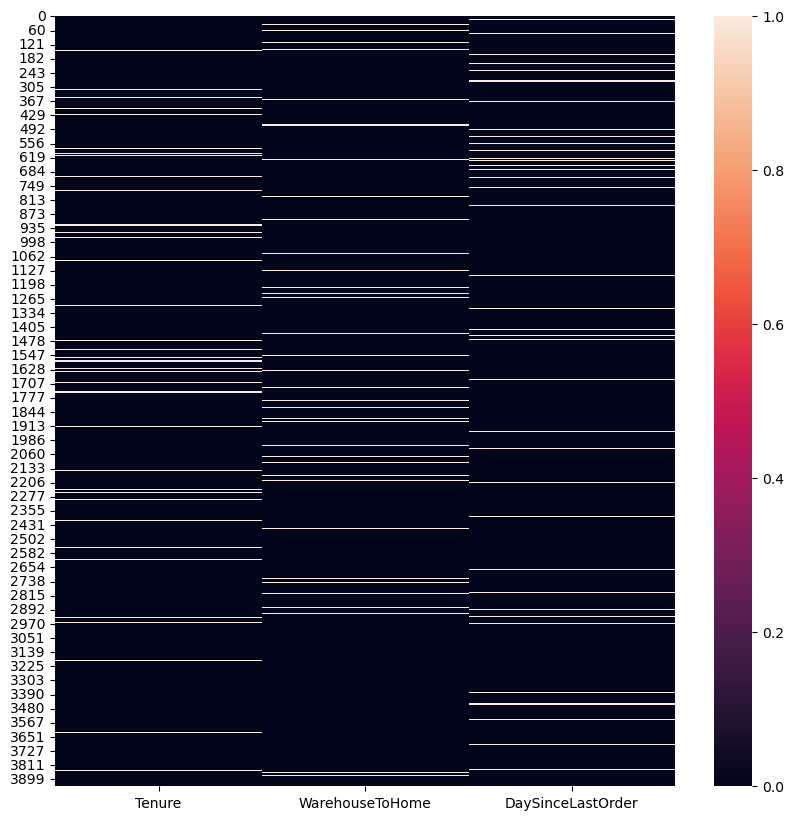

In [1376]:
print('Sebaran missing value pada kolom dataframe yang mengandung null menggunakan heatmap')
plt.figure(figsize=(10,10))
sns.heatmap(df.loc[:,list(df.isnull().any(axis=0))].isna())

Hubungan khusus antar kolom null tidak terlihat.

In [1377]:
pd.set_option('display.max_colwidth', None)
listItem = []
tempDf = df.loc[:,list(df.isnull().any(axis=0))]
for col in tempDf.columns :
    listItem.append([col, tempDf[col].dtype, tempDf[col].isna().sum(), 
                     round((tempDf[col].isna().sum()/len(tempDf[col]))*100,2),
                     tempDf[col].nunique(), 
                     list(tempDf[col].drop_duplicates())])
                    
dfDesc = pd.DataFrame(columns=['dataFeatures', 'dataType', 'null', 'nullPercent', 'unique', 'uniqueSample'], data=listItem)
display(dfDesc)

,dataFeatures,dataType,null,nullPercent,unique,uniqueSample
0,Tenure,float64,160,4.89,36,"[15.0, 7.0, 27.0, 20.0, 30.0, 1.0, 11.0, 17.0, 6.0, 16.0, 10.0, nan, 8.0, 19.0, 0.0, 3.0, 5.0, 9.0, 18.0, 12.0, 24.0, 4.0, 61.0, 25.0, 13.0, 14.0, 2.0, 21.0, 29.0, 26.0, 23.0, 31.0, 22.0, 28.0, 51.0, 60.0, 50.0]"
1,WarehouseToHome,float64,135,4.13,33,"[29.0, 25.0, 13.0, 15.0, 16.0, 11.0, 12.0, 7.0, 26.0, 20.0, 14.0, 8.0, 21.0, 22.0, 27.0, 18.0, 33.0, 9.0, 17.0, nan, 6.0, 31.0, 28.0, 10.0, 19.0, 32.0, 23.0, 30.0, 35.0, 34.0, 24.0, 5.0, 36.0, 127.0]"
2,DaySinceLastOrder,float64,181,5.54,22,"[7.0, nan, 8.0, 11.0, 2.0, 1.0, 4.0, 3.0, 6.0, 0.0, 14.0, 9.0, 10.0, 12.0, 5.0, 17.0, 30.0, 18.0, 16.0, 13.0, 15.0, 46.0, 31.0]"


Adalah penting untuk melakukan drop menurut batas tertentu, dalam kasus ini jika 2 atau lebih kolom mengandung null maka akan dihapus atau drop.

In [1378]:
print(f'Length df : {len(df)}')
print(f'Length df jika di drop untuk kolom dengan 2 null atau lebih : {len(df.dropna(subset=list(tempDf.columns), thresh=2))}')
# thresh berarti minimal 2 dari 3 kolom yang dipilih sebelumnya tidak null, maka tidak di drop.

Length df : 3270
Length df jika di drop untuk kolom dengan 2 null atau lebih : 3270


Ternyata, tidak ada sama sekali yang memiliki 2 null atau lebih pada satu baris.

Kemudian, dalam menangani lebih lanjut masing-masing kolom, hal-hal seperti normalitas, deskripsi statistik, korelasi antar kolom perlu dicek.

Nullity correlation heatmap


<Axes: >

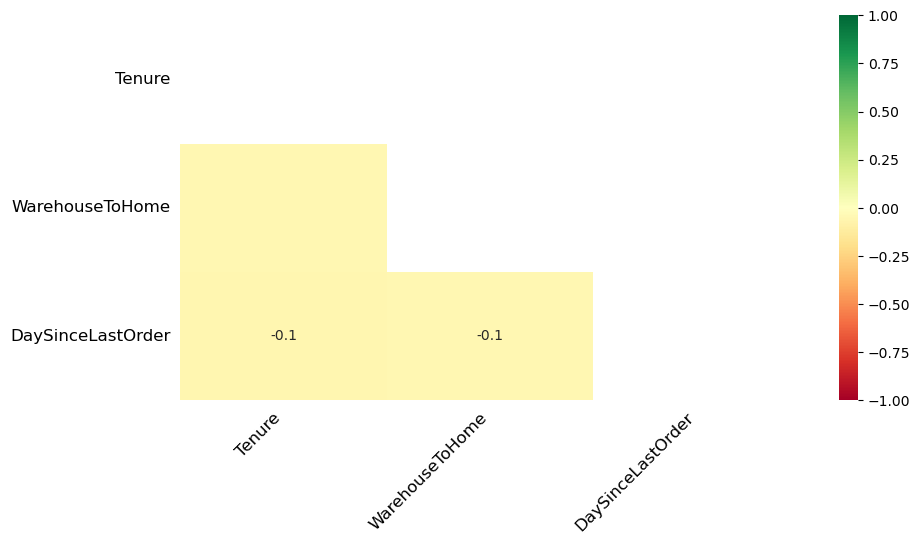

In [1379]:
print('Nullity correlation heatmap')
missingno.heatmap(df, cmap="RdYlGn", figsize=(10,5), fontsize=12)

Tidak terdapat null yang berkorelasi tinggi antar kolom yang mengandung null.

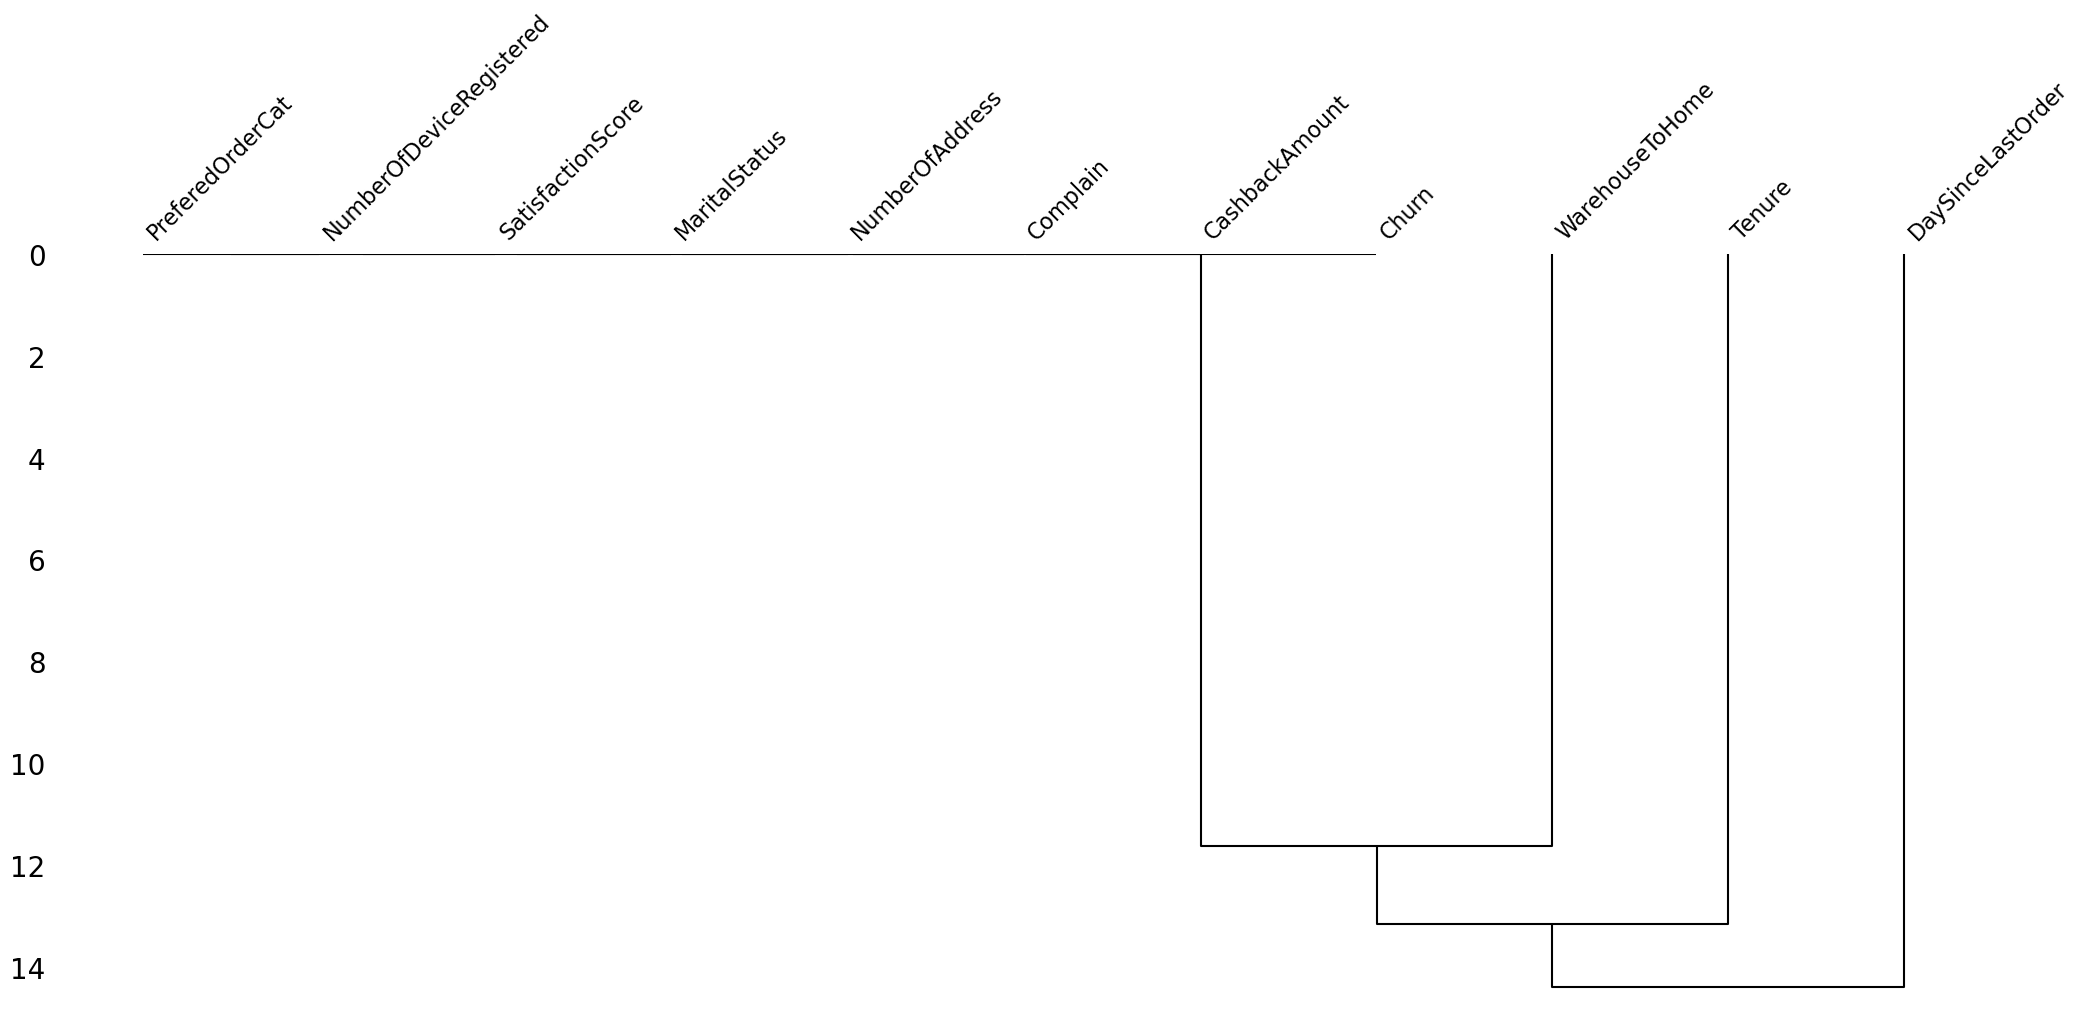

In [1380]:
missingno.dendrogram(df)
plt.show()

Sesuai dengan analisa null sebelumnya, hanya `Tenure`, `WarehouseToHome`, dan `DaySinceLastOrder` yang memiliki null. Dendrogram juga menunjukkan bahwa ketidakmiripan (dissimilarity) antara tiga fitur paling kanan yang mengandung null adalah sangat tinggi. Hal ini berarti memang benar null tidak punya hubungan khusus secara nullity.

Mengecek hubungan missing values dengan non null values.

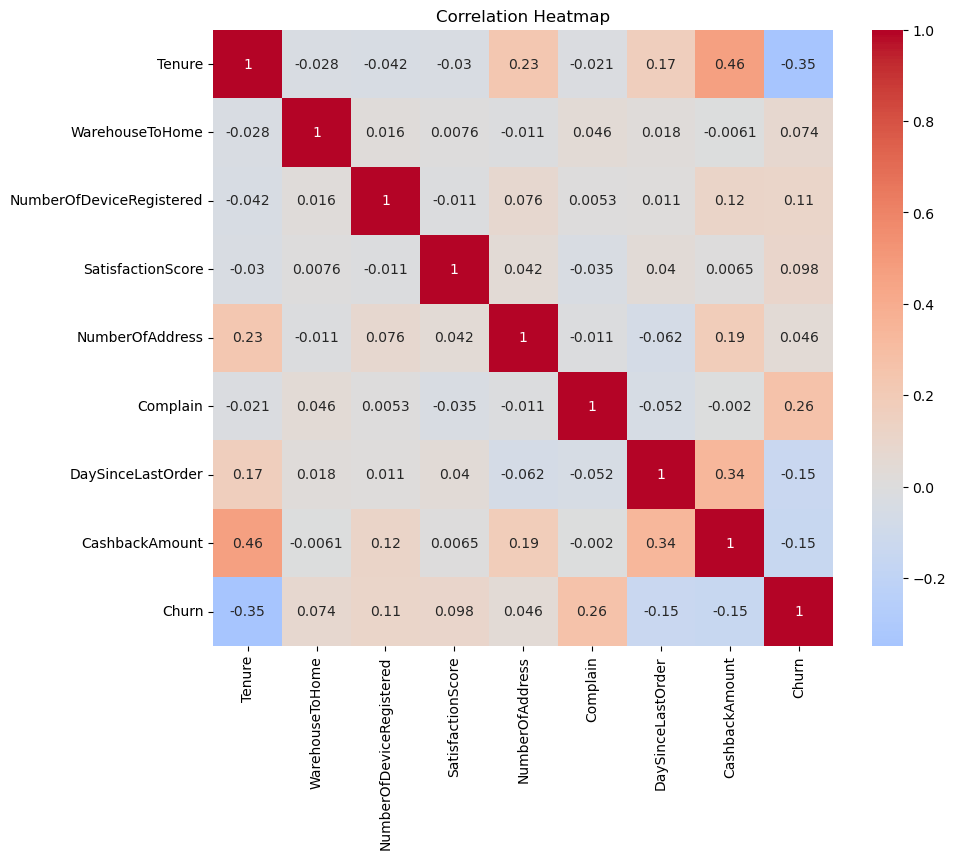

In [1381]:
correlation_matrix = data_mcar.corr()

# Create a heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', center=0)
plt.title('Correlation Heatmap')
plt.show()

Tidak ada korelasi data numerik antar kolom yang cukup tinggi.

Namun, sebaiknya baris atau entri data tidak dibuang karena jumlah data hanya sedikit (< 5000 data) yang dapat menyebabkan hilangnya informasi penting dari data. Oleh karena itu, data null akan diisi.

In [1382]:
ttt = df[list(tempDf.columns)].describe().loc[['mean','std'],:]
ttt

,Tenure,WarehouseToHome,DaySinceLastOrder
mean,10.190354,15.510367,4.545484
std,8.650821,8.568382,3.696022


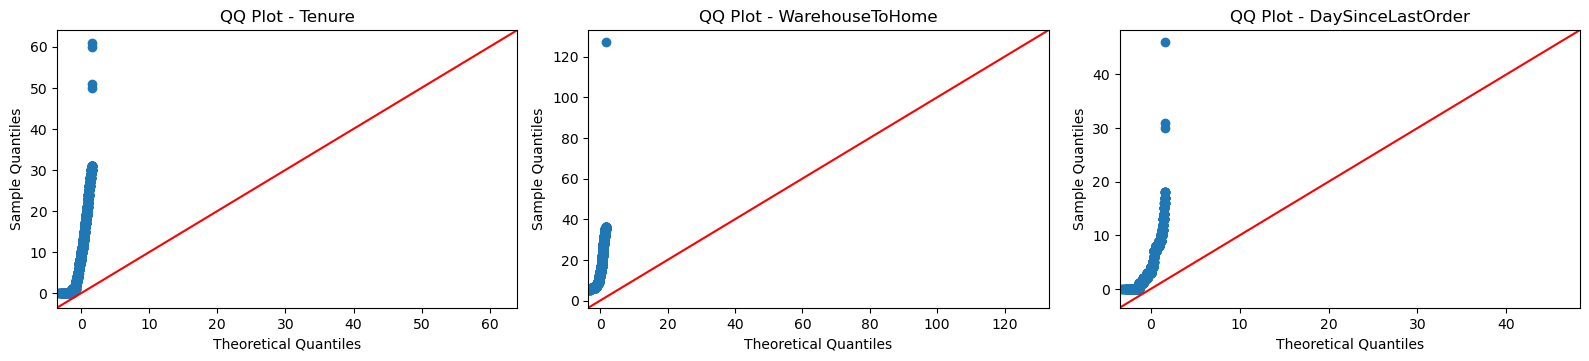

In [1383]:
iterPlt = 1
plt.figure(figsize=(16,10))

for i in tempDf.columns:
    # Generate some sample data
    data = df[i]

    # Create QQ plot
    ax = plt.subplot(3,3, iterPlt)
    sm.qqplot(data, line='45', ax=ax)
    plt.title(f'QQ Plot - {i}')
    plt.xlabel('Theoretical Quantiles')
    plt.ylabel('Sample Quantiles')
    plt.tight_layout()
    
    iterPlt += 1


Uji normalitas menggunakan QQ plot menunjukkan ketiga kolom yang ingin diisi tidak terdistribusi normal, maka menggunakan median untuk SimpleImputer.

In [1384]:
simple_imputer_median = SimpleImputer(strategy='median')
df_median_imputed = pd.DataFrame(simple_imputer_median.fit_transform(df[list(tempDf.columns)]), columns=tempDf.columns)

print("Median Imputed DataFrame:")
display(df_median_imputed.isna().sum(),df_median_imputed.describe().loc[['mean','std'],:])
ttt1 = df_median_imputed.describe().loc[['mean','std'],:]

Median Imputed DataFrame:


Tenure               0
WarehouseToHome      0
DaySinceLastOrder    0
dtype: int64

,Tenure,WarehouseToHome,DaySinceLastOrder
mean,10.132110,15.406728,4.459939
std,8.440368,8.404449,3.609590


In [1385]:
knn_imputer = KNNImputer(n_neighbors=3, weights='uniform')
df_knn_imputed = pd.DataFrame(knn_imputer.fit_transform(df.select_dtypes(include='number')), columns=df.select_dtypes(include='number').columns)

print("KNN Imputed DataFrame:")
display(df_knn_imputed[['Tenure','WarehouseToHome','DaySinceLastOrder']].isna().sum(),df_knn_imputed.describe().loc[['mean','std'],['Tenure','WarehouseToHome','DaySinceLastOrder']])
ttt2 = df_knn_imputed.describe().loc[['mean','std'],['Tenure','WarehouseToHome','DaySinceLastOrder']]

KNN Imputed DataFrame:


Tenure               0
WarehouseToHome      0
DaySinceLastOrder    0
dtype: int64

,Tenure,WarehouseToHome,DaySinceLastOrder
mean,9.924669,15.538226,4.714169
std,8.583228,8.458370,3.756207


In [1386]:
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer

imputer = IterativeImputer(max_iter=10, random_state = 2024)
imputer.fit(df.select_dtypes(include='number'))

imputed_df = pd.DataFrame(imputer.transform(df.select_dtypes(include='number')), columns=df.select_dtypes(include='number').columns)
ttt3 = imputed_df.describe().loc[['mean','std'],['Tenure','WarehouseToHome','DaySinceLastOrder']]

In [1387]:
print("KNN Imputed DataFrame:")
display(imputed_df[['Tenure','WarehouseToHome','DaySinceLastOrder']].isna().sum(),imputed_df.describe().loc[['mean','std'],['Tenure','WarehouseToHome','DaySinceLastOrder']])

KNN Imputed DataFrame:


Tenure               0
WarehouseToHome      0
DaySinceLastOrder    0
dtype: int64

,Tenure,WarehouseToHome,DaySinceLastOrder
mean,9.907918,15.511344,4.603813
std,8.563663,8.389594,3.602502


In [1388]:
def diffCalc(ttt,ttt1):
    listCol1 = ['Tenure','WarehouseToHome','DaySinceLastOrder']
    listInd1 = ['mean','std']
    listAns1 = []
    for i in listCol1:
        listTemp1 = []
        for j in listInd:
            listTemp1.append(round(abs(ttt.loc[j,i] - ttt1.loc[j,i] )/  ttt.loc[j,i] *100,2))
        listAns1.append(listTemp1)
    dfDescAns1 = pd.DataFrame(np.array(listAns1).T, columns=listCol1, index=listInd1)
    return dfDescAns1

Kalkulasi perbedaan mean dan std dalam percent

In [1389]:
print('SimpleImputer')
print((diffCalc(ttt,ttt1)).mean(axis=1),'\n')
print('KNNImputer')
print((diffCalc(ttt,ttt2)).mean(axis=1),'\n')
print('IterativeImputer')
print((diffCalc(ttt,ttt3)).mean(axis=1),'\n')

SimpleImputer
mean    1.040000
std     2.226667
dtype: float64 

KNNImputer
mean    2.166667
std     1.230000
dtype: float64 

IterativeImputer
mean    1.353333
std     1.876667
dtype: float64 



Karena tidak signifikan berbedanya dari metode impute manapun dan mempertimbangkan kerumitan prosesnya, kemungkinan overfitting iterative maupun KNN, dan tidak cukupnya hubungan antar kolom yang mengandung null terhadap kolom lain maupun kolom null lain, maka dipilih SimpleImputer.

In [1390]:
df.reset_index(inplace=True, drop=True)
df_median_imputed.reset_index(inplace=True, drop=True)

In [1391]:
df[['Tenure','WarehouseToHome','DaySinceLastOrder']]

,Tenure,WarehouseToHome,DaySinceLastOrder
0,15.0,29.0,7.0
1,7.0,25.0,7.0
2,27.0,13.0,7.0
3,20.0,25.0,NaN
4,30.0,15.0,8.0
...,...,...,...
3265,25.0,15.0,8.0
3266,26.0,7.0,9.0
3267,28.0,9.0,1.0
3268,8.0,7.0,4.0


In [1392]:
df_median_imputed

,Tenure,WarehouseToHome,DaySinceLastOrder
0,15.0,29.0,7.0
1,7.0,25.0,7.0
2,27.0,13.0,7.0
3,20.0,25.0,3.0
4,30.0,15.0,8.0
...,...,...,...
3265,25.0,15.0,8.0
3266,26.0,7.0,9.0
3267,28.0,9.0,1.0
3268,8.0,7.0,4.0


In [1393]:
df[['Tenure','WarehouseToHome','DaySinceLastOrder']] = df_median_imputed

In [1394]:
df.isna().sum()

Tenure                      0
WarehouseToHome             0
NumberOfDeviceRegistered    0
PreferedOrderCat            0
SatisfactionScore           0
MaritalStatus               0
NumberOfAddress             0
Complain                    0
DaySinceLastOrder           0
CashbackAmount              0
Churn                       0
dtype: int64

Mengecek Outliers Ekstrem

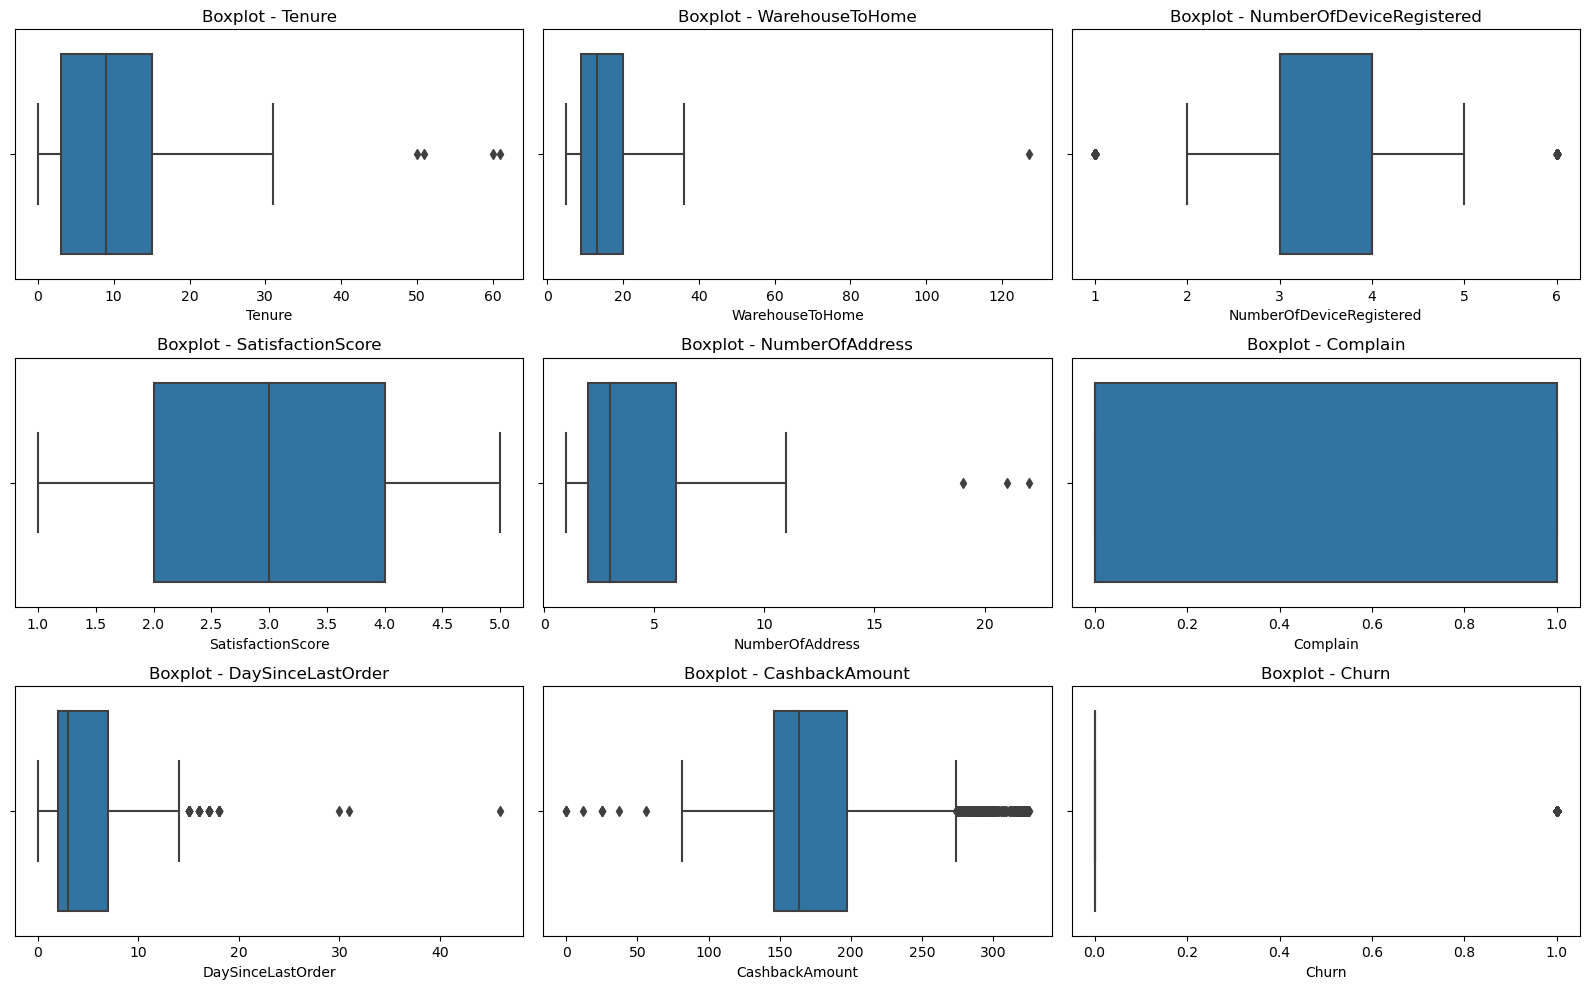

In [1395]:
col_names = list(df.select_dtypes(include='number').columns)
iterPlt = 1
plt.figure(figsize=(16,10))

for col in col_names:
    plt.subplot(3,3, iterPlt)
    sns.boxplot(data=df, x=col)
    plt.title(f'Boxplot - {col}')
    plt.tight_layout()

    iterPlt += 1

Complain adalah berupa boolean dalam bentuk 0 dan 1 begitu pula dengan churn yang juga merupakan target dalam masalah klasifikasi ini, lalu fitur lainnya masih ada di dalam batas wajar yang dapat terlihat pada fitur yang berhubungan dengan jumlah suatu besaran integer seperti fitur dengan judul NumberOf... dan besaran waktu seperti `DaySinceLastOrder` maupun `Tenure`. Fitur `Score` juga sudah terlihat baik. Terdapat 2 fitur yang perlu ditinjau lebih lanjut, yaitu `WarehouseToHome` yang memiliki outlier cukup ekstrem dan `CashbackAmount` yang merupakan tipe currency yang punya kemungkinan memiliki oultier ekstrem juga.

Text(0.5, 0.98, 'Distribusi frekuensi WarehouseToHome dan CashbackAmount')

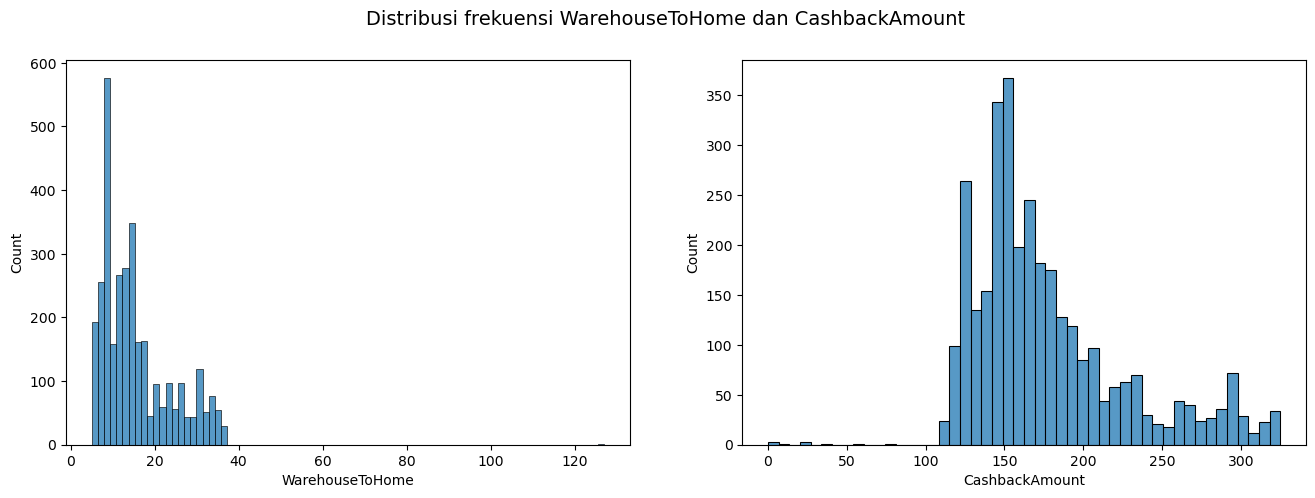

In [1396]:
plt.figure(figsize=(16,5))

plt.subplot(1,2,1)
sns.histplot(data=df, x='WarehouseToHome')
plt.subplot(1,2,2)
sns.histplot(data=df, x='CashbackAmount')

plt.suptitle('Distribusi frekuensi WarehouseToHome dan CashbackAmount', size= 14)

In [1397]:
print(f"Banyak Outlier ekstrem WarehouseToHome : {len(df[df['WarehouseToHome']>40])} dari {len(df)}") 
print(f"Banyak Outlier ekstrem CashbackAmount : {len(df[df['CashbackAmount']<100])} dari {len(df)}") 

Banyak Outlier ekstrem WarehouseToHome : 1 dari 3270
Banyak Outlier ekstrem CashbackAmount : 10 dari 3270


Outlier ekstrem yang akan dihapus adalah WarehouseToHome karena memang hanya 1 dan jarak yang sangat jauh satu-satunya. Namun, CashbackAmount hanya ada yang oulier ekstrem pada mendekati nilai nol. Dalam hal tipe currency, hal ini sangat wajar, oleh karena itu data tidak dihapus.

In [1398]:
df = df[df['WarehouseToHome']<40]
df.reset_index(inplace=True,drop=True)

Penyesuaian format

In [1399]:
df['Tenure'] = df['Tenure'].astype('int64')
df['WarehouseToHome'] = df['WarehouseToHome'].astype('int64')
df['DaySinceLastOrder'] = df['DaySinceLastOrder'].astype('int64')

Data Clean

In [1400]:
pd.set_option('display.max_colwidth', None)
listItem = []
for col in df.columns :
    listItem.append([col, df[col].dtype, df[col].isna().sum(), 
                     round((df[col].isna().sum()/len(df[col]))*100,2),
                     df[col].nunique(), 
                     list(df[col].drop_duplicates())])
                    
dfDesc = pd.DataFrame(columns=['dataFeatures', 'dataType', 'null', 'nullPercent', 'unique', 'uniqueSample'], data=listItem)
display(dfDesc)

,dataFeatures,dataType,null,nullPercent,unique,uniqueSample
0,Tenure,int64,0,0.0,36,"[15, 7, 27, 20, 30, 1, 11, 17, 6, 16, 10, 9, 8, 19, 0, 3, 5, 18, 12, 24, 4, 61, 25, 13, 14, 2, 21, 29, 26, 23, 31, 22, 28, 51, 60, 50]"
1,WarehouseToHome,int64,0,0.0,32,"[29, 25, 13, 15, 16, 11, 12, 7, 26, 20, 14, 8, 21, 22, 27, 18, 33, 9, 17, 6, 31, 28, 10, 19, 32, 23, 30, 35, 34, 24, 5, 36]"
2,NumberOfDeviceRegistered,int64,0,0.0,6,"[4, 3, 6, 2, 5, 1]"
3,PreferedOrderCat,object,0,0.0,6,"[Laptop & Accessory, Mobile, Fashion, Others, Mobile Phone, Grocery]"
4,SatisfactionScore,int64,0,0.0,5,"[3, 1, 4, 2, 5]"
5,MaritalStatus,object,0,0.0,3,"[Single, Married, Divorced]"
6,NumberOfAddress,int64,0,0.0,14,"[2, 5, 7, 8, 3, 1, 9, 4, 10, 11, 6, 19, 22, 21]"
7,Complain,int64,0,0.0,2,"[0, 1]"
8,DaySinceLastOrder,int64,0,0.0,22,"[7, 3, 8, 11, 2, 1, 4, 6, 0, 14, 9, 10, 12, 5, 17, 30, 18, 16, 13, 15, 46, 31]"
9,CashbackAmount,float64,0,0.0,2335,"[143.32, 129.29, 168.54, 230.27, 322.17, 152.81, 149.51, 154.73, 137.02, 157.43, 221.1, 180.38, 154.09, 231.09, 163.92, 193.15, 121.68, 204.78, 259.96, 127.16, 191.96, 153.01, 126.7, 189.98, 205.95, 148.5, 175.1, 124.32, 204.82, 228.06, 196.13, 205.52, 262.44, 125.46, 123.67, 123.22, 264.73, 122.18, 141.94, 172.87, 139.29, 207.48, 208.92, 296.59, 120.08, 197.64, 151.95, 171.8, 174.84, 152.96, 140.11, 303.75, 226.24, 265.55, 156.47, 179.84, 145.29, 123.68, 268.36, 154.29, 125.64, 144.78, 129.11, 165.31, 135.81, 148.4, 149.5, 136.6, 204.35, 208.46, 125.17, 217.41, 224.9, 211.21, 143.93, 146.68, 167.49, 149.0, 163.49, 145.38, 190.24, 140.69, 188.58, 222.13, 122.7, 141.98, 145.97, 262.34, 140.25, 219.04, 197.56, 179.91, 120.75, 189.66, 110.91, 188.37, 239.16000000000005, 145.08, 179.88, 127.78, ...]"


In [1401]:
# df.to_csv('data_ecommerce_customer_churn_clean.csv', index=False)
# df.to_pickle('data_ecommerce_customer_churn_clean.pkl')

## D. Data Analysis

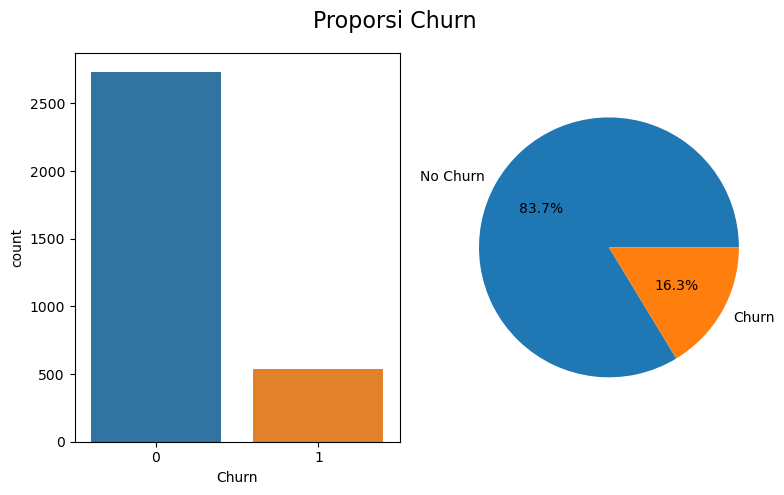

In [1402]:
plt.figure(figsize=(8,5)).suptitle('Proporsi Churn', fontsize=16)

plt.subplot(1,2,1)
sns.countplot(data=df, x='Churn')

plt.subplot(1,2,2)
plt.pie(df['Churn'].value_counts(), labels=['No Churn','Churn'], autopct='%.1f%%')

plt.tight_layout()
plt.show()  

Terlihat bahwa dataset bersifat imbalance berdasarkan target dari data yang ditujukan untuk klasifikasi ini, yaitu churn. Proporsi churn sebagai minoritas terlihat hanya 16.3% yang berarti dataset adalah imbalance moderat (1-20% dataset) [1]. Penanganan dataset imbalance adalah menggunakan teknik resampling, namun mengingat volume data yang sedikit (<5000), maka dilakukan dengan oversampling pada data minoritas.

Sumber : 

[1] https://developers.google.com/machine-learning/data-prep/construct/sampling-splitting/imbalanced-data

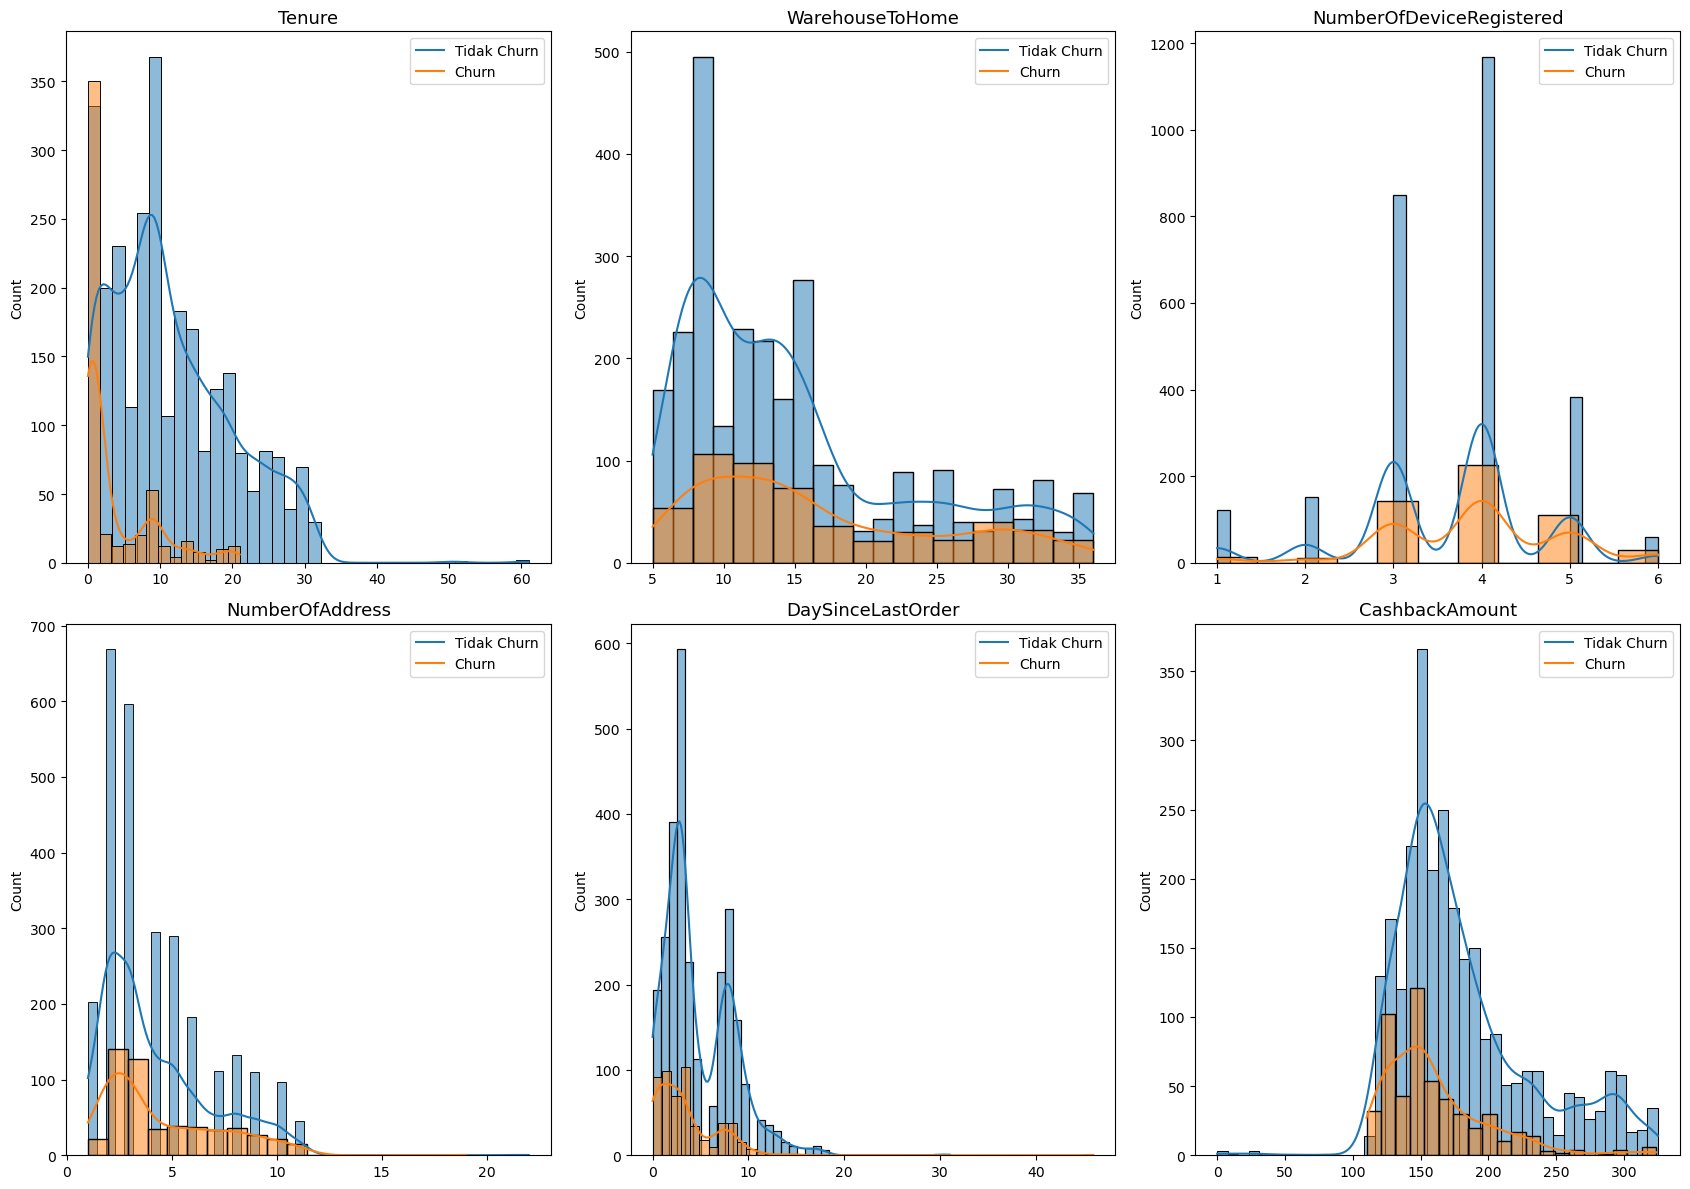

In [1403]:
plt.figure(figsize=(17,12))

columns = ['Tenure','WarehouseToHome','NumberOfDeviceRegistered', 'NumberOfAddress', 'DaySinceLastOrder', 'CashbackAmount']
iterPlt = 1

for i in columns:
    plt.subplot(2, 3, iterPlt)

    sns.histplot(x=df[df['Churn'] == 0][i], kde=True)
    sns.histplot(x=df[df['Churn'] == 1][i], kde=True)

    plt.title(f'{i}', fontsize=13)
    plt.ylabel('Count')
    plt.xlabel('')
    plt.legend(labels=['Tidak Churn', 'Churn'])

    plt.tight_layout()
    iterPlt += 1
plt.show()

Berdasarkan histogram di atas, dapat disimpulkan beberapa hal berikut:

1. Terlihat perbedaan distribusi `Tenure` dari target yang tidak churn dan churn. Customer yang churn, `Tenure`-nya cenderung lebih rendah daripada yang tidak churn. Hal ini sangat masuk akal, karena churn yang merupakan waktu dalam besaran tertentu sejak customer terdaftar di platform tentu jika customer sudah lama terdaftar maka kemungkinan customer adalah customer loyal. Sebaliknya, customer baru akan lebih mudah untuk churn.

2. Terlihat perbedaan distribusi namun tidak begitu drastis pada `CashbackAmount` di mana jumlah cashback sedikit customer cenderung churn. Hal ini juga sangat masuk akal, karena jumlah cashback yang didapatkan customer yang lebih sedikit akan mengurangi insentif customer untuk tetap loyal.

3. Terlihat juga perbedaan distribusi yang tidak begitu drastis pada `DaySinceLastOrder`, di mana jumlah churn cenderung banyak pada jumlah hari sedikit sejak pemesanan terakhir. Hal ini tidak dapat diintuisikan secara langsung, namun perlu dilihat apakah jika pemesanan terakhir lebih dekat berarti customer yang penting (seperti pada RFM analysis) atau customer baru.

4. `WarehouseToHome`, `NumberOfDeviceRegistered`, dan `NumberOfAddress` memiliki distribusi yang mirip antara churn dan tidak churn. Hal ini mengimplikasikan fitur tidak terlalu berpengaruh terhadap target.

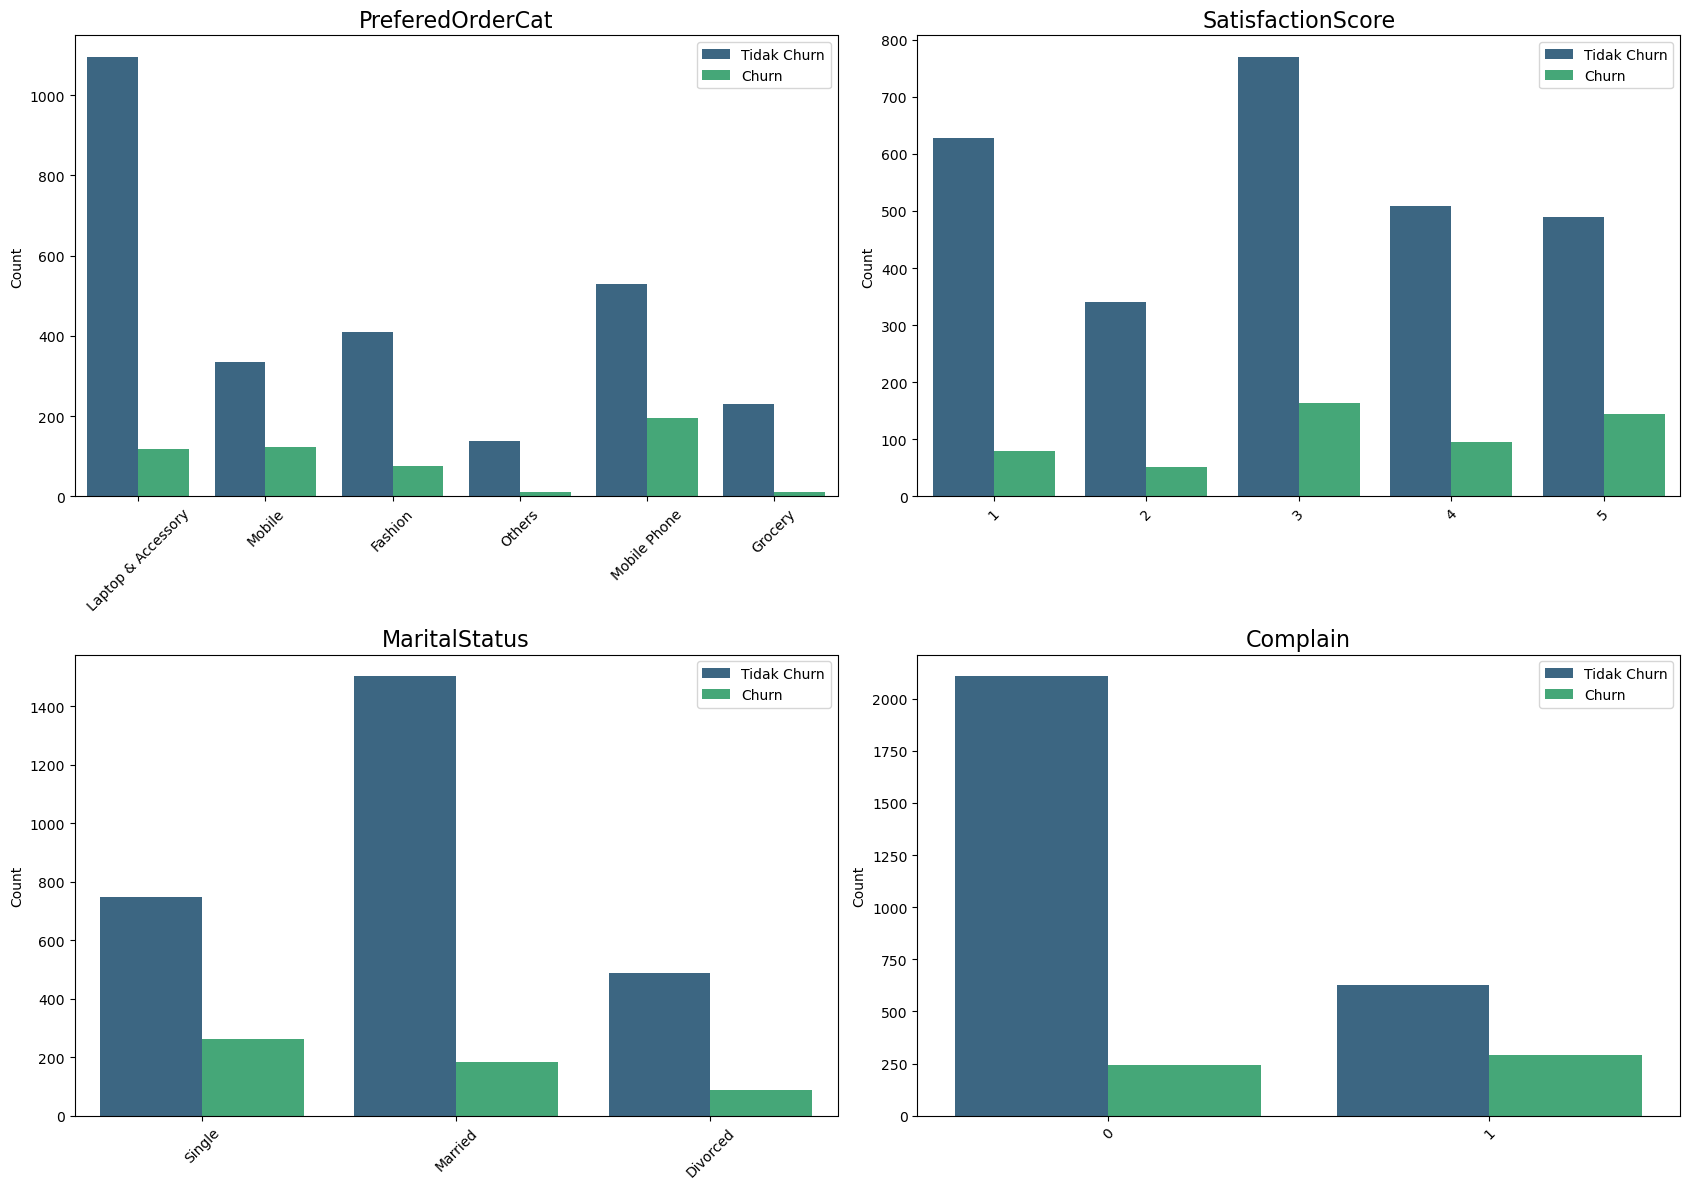

In [1404]:
plt.figure(figsize=(17,12))

columns = ['PreferedOrderCat','SatisfactionScore','MaritalStatus', 'Complain']
iterPlt = 1

for i in columns:
    plt.subplot(2, 2, iterPlt)

    sns.countplot(x=i, hue='Churn', data=df, palette='viridis')

    plt.title(f'{i}', fontsize=16)
    plt.ylabel('Count')
    plt.xlabel('')
    plt.xticks(rotation=45)
    plt.legend(labels=['Tidak Churn', 'Churn'])

    plt.tight_layout()
    iterPlt += 1
plt.show()

Berdasarkan barplot tersebut dapat disimpulkan beberapa hal:

1. Pada `PreferedOrderCat` customer yang punya kemungkinan tinggi akan churn adalah untuk kategori 'Mobile Phone'.
2. Nilai `SatisfactionScore` customer 5 cenderung akan churn dilihat dari perbandingan antara jumlah churn dan tidak churn.
3. Status `MaritalStatus` menjelaskan bahwa customer yang berstatus 'Single' lebih cenderung untuk churn.
4. Label `Complain`, sesuai intuisi, cenderung churn saat customer memberikan complain.


## E. Data Preparation 

**Feature Engineering**

**Feature**
1. `Tenure`                      : Dapat menggunakan RobustScaler untuk menangani kecenderungan outlier dan data tersebar
2. `WarehouseToHome`             : Dapat menggunakan RobustScaler untuk menangani kecenderungan outlier dan data tersebar
3. `NumberOfDeviceRegistered`    : Tidak perlu dilakukan scaling ataupun encoding
4. `PreferedOrderCat`            : Perlu Binary Encoding karena ada banyak kategori (>5) dan tidak punya tingkatan khusus sehingga Ordinal tidak cocok
5. `SatisfactionScore`           : Tidak perlu dilakukan scaling ataupun encoding, sudah dalam bentuk ordinal atau integer
6. `MaritalStatus`               : Encoding menggunakan One Hot Encoding untuk 3 nilai kategorikal
7. `NumberOfAddress`             : Binning dapat dilakukan untuk mengatasi data tersebar dan hubungan yang tidak tentu linear terhadap target
8. `Complain`                    : Encoding tidak dibutuhkan, sudah dalam bentuk binary
9. `DaySinceLastOrder`           : Binning dilakukan karena selain data tersebar, data memiliki hubungan yang kompleks 
10. `CashbackAmount`             : Dapat menggunakan RobustScaler untuk menangani kecenderungan outlier dan data tersebar

**Target**
1. `Churn`                       : Encoding tidak dibutuhkan, sudah dalam bentuk binary

In [1405]:
df.head()

,Tenure,WarehouseToHome,NumberOfDeviceRegistered,PreferedOrderCat,SatisfactionScore,MaritalStatus,NumberOfAddress,Complain,DaySinceLastOrder,CashbackAmount,Churn
0,15,29,4,Laptop & Accessory,3,Single,2,0,7,143.32,0
1,7,25,4,Mobile,1,Married,2,0,7,129.29,0
2,27,13,3,Laptop & Accessory,1,Married,5,0,7,168.54,0
3,20,25,4,Fashion,3,Divorced,7,0,3,230.27,0
4,30,15,4,Others,4,Single,8,0,8,322.17,0


Binning dengan custom bin edges. 

Untuk `NumberOfAddress` 0-5 sedikit, 5-10 sedang, >10 banyak.

Untuk `DaySinceLastOrder` 0-7 hari, 1-2 minggu, >2 minggu.


In [1406]:
bins1 = pd.cut(df['NumberOfAddress'], bins=[0, 5, 10, df['NumberOfAddress'].max()], labels=False)
bins2 = pd.cut(df['DaySinceLastOrder'], bins=[-1, 7, 14, df['DaySinceLastOrder'].max()], labels=False) # -1 is only for including 0

In [1407]:
display(bins1.value_counts(), bins2.value_counts())

NumberOfAddress
0    2416
1     790
2      63
Name: count, dtype: int64

DaySinceLastOrder
0    2511
1     718
2      40
Name: count, dtype: int64

Hasil binning sudah ordinal

In [1408]:
df['NumberOfAddress'] = bins1
df['DaySinceLastOrder'] = bins2

In [1409]:
df.head()

,Tenure,WarehouseToHome,NumberOfDeviceRegistered,PreferedOrderCat,SatisfactionScore,MaritalStatus,NumberOfAddress,Complain,DaySinceLastOrder,CashbackAmount,Churn
0,15,29,4,Laptop & Accessory,3,Single,0,0,0,143.32,0
1,7,25,4,Mobile,1,Married,0,0,0,129.29,0
2,27,13,3,Laptop & Accessory,1,Married,0,0,0,168.54,0
3,20,25,4,Fashion,3,Divorced,1,0,0,230.27,0
4,30,15,4,Others,4,Single,1,0,1,322.17,0


**Encoders dan Scalers**

In [1410]:
transformer = ColumnTransformer([
    ('scaler', RobustScaler(), ['Tenure','WarehouseToHome','CashbackAmount']),
    ('binary', ce.BinaryEncoder(), ['PreferedOrderCat']),
    ('onehot', OneHotEncoder(drop='first'), ['MaritalStatus'])
], remainder='passthrough')

In [1411]:
transformer

ColumnTransformer(remainder='passthrough',
                  transformers=[('scaler', RobustScaler(),
                                 ['Tenure', 'WarehouseToHome',
                                  'CashbackAmount']),
                                ('binary', BinaryEncoder(),
                                 ['PreferedOrderCat']),
                                ('onehot', OneHotEncoder(drop='first'),
                                 ['MaritalStatus'])])

**Data Splitting**

In [1412]:
x = df.drop(columns=['Churn'])
y = df['Churn']

In [1413]:
x_train,x_test,y_train,y_test=train_test_split( x, y, stratify=y, test_size=0.2, random_state=2024)

In [1414]:
testing = pd.DataFrame(transformer.fit_transform(x_train), columns=transformer.get_feature_names_out())
testing.head()

,scaler__Tenure,scaler__WarehouseToHome,scaler__CashbackAmount,binary__PreferedOrderCat_0,binary__PreferedOrderCat_1,binary__PreferedOrderCat_2,onehot__MaritalStatus_Married,onehot__MaritalStatus_Single,remainder__NumberOfDeviceRegistered,remainder__SatisfactionScore,remainder__NumberOfAddress,remainder__Complain,remainder__DaySinceLastOrder
0,0.000000,1.333333,-0.817515,0.0,0.0,1.0,0.0,0.0,3.0,2.0,1.0,0.0,0.0
1,0.000000,0.190476,-0.854765,0.0,0.0,1.0,0.0,0.0,3.0,2.0,0.0,0.0,0.0
2,-0.250000,0.952381,2.191401,0.0,1.0,0.0,0.0,1.0,3.0,3.0,0.0,0.0,0.0
3,0.083333,0.000000,-0.804042,0.0,0.0,1.0,0.0,0.0,3.0,2.0,0.0,1.0,0.0
4,1.000000,-0.571429,2.354072,0.0,1.0,1.0,0.0,1.0,4.0,1.0,1.0,0.0,0.0


## F. Modeling & Evaluation

In [1415]:
logreg = LogisticRegression()
knn = KNeighborsClassifier()
dt = DecisionTreeClassifier(random_state = 123456)
rf = RandomForestClassifier(random_state = 123456)
xgb = XGBClassifier(random_state = 123456)
lgbm = lgb.LGBMClassifier(random_state = 123456)

### Model Benchmarking : K-Fold

In [1416]:
models = [logreg,knn,dt,rf,xgb,lgbm]
score=[]
meanROC=[]
std=[]

for i in models:
    skfold=StratifiedKFold(n_splits=5)
    estimator=Pipeline([
        ('preprocess',transformer),
        ('model',i)])
    model_cv=cross_val_score(estimator,x_train,y_train,cv=skfold,scoring='roc_auc')
    score.append(model_cv)
    meanROC.append(model_cv.mean())
    std.append(model_cv.std())
    
pd.DataFrame({'model':['Logistic Regression', 'KNN', 'Decision Tree', 'Random Forest', 'XGBoost', 'LightGBM'],'mean roc_auc':meanROC,'std':std}).set_index('model').sort_values(by='mean roc_auc',ascending=False)

[LightGBM] [Info] Number of positive: 342, number of negative: 1750
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000155 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 351
[LightGBM] [Info] Number of data points in the train set: 2092, number of used features: 13
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.163480 -> initscore=-1.632560
[LightGBM] [Info] Start training from score -1.632560
[LightGBM] [Info] Number of positive: 342, number of negative: 1750
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000330 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 351
[LightGBM] [Info] Number of data points in the train set: 2092, number of used features: 13
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.163480 -> initscore=-1.632560
[LightGBM] [

,mean roc_auc,std
model,,
Random Forest,0.923275,0.010190
LightGBM,0.922073,0.009626
XGBoost,0.917523,0.008245
Logistic Regression,0.869068,0.021625
KNN,0.828856,0.008872
Decision Tree,0.781184,0.018700


Seperti terlihat di atas, performa training model Random Forest adalah terbaik dilihat dari metric utama roc_auc diikuti dengan LightGBM yang walaupun hanya roc_auc kedua namun karena perbedaan roc_auc juga sedikit dan mempunyai standard deviasi paling kecil sehingga menjadi yang terbaik jika dibandingkan dengan semua model benchmark yang menggunakan default hyperparameter masing-masing.

1. LightGBM
2. Random Forest

In [1417]:
models = [logreg,knn,dt,rf,xgb,lgbm]
score_roc_auc = []

def y_pred_func(i):
    estimator=Pipeline([
        ('preprocess',transformer),
        ('model',i)])
    estimator.fit(x_train,y_train)
    return(estimator,estimator.predict(x_test),x_test)

for i,j in zip(models, ['Logistic Regression', 'KNN', 'Decision Tree', 'Random Forest', 'XGBoost','LightGBM']):
    estimator,y_pred,x_test = y_pred_func(i)
    y_predict_proba = estimator.predict_proba(x_test)[:,1]
    score_roc_auc.append(roc_auc_score(y_test,y_predict_proba))
    print(j,'\n', classification_report(y_test,y_pred))
    
pd.DataFrame({'model':['Logistic Regression', 'KNN', 'Decision Tree', 'Random Forest', 'XGBoost','LightGBM'],
             'roc_auc score':score_roc_auc}).set_index('model').sort_values(by='roc_auc score',ascending=False)

Logistic Regression 
               precision    recall  f1-score   support

           0       0.89      0.97      0.93       547
           1       0.70      0.41      0.52       107

    accuracy                           0.87       654
   macro avg       0.80      0.69      0.72       654
weighted avg       0.86      0.87      0.86       654

KNN 
               precision    recall  f1-score   support

           0       0.89      0.98      0.93       547
           1       0.79      0.39      0.52       107

    accuracy                           0.88       654
   macro avg       0.84      0.69      0.73       654
weighted avg       0.88      0.88      0.87       654

Decision Tree 
               precision    recall  f1-score   support

           0       0.93      0.92      0.93       547
           1       0.62      0.65      0.64       107

    accuracy                           0.88       654
   macro avg       0.78      0.79      0.78       654
weighted avg       0.88      0

,roc_auc score
model,
LightGBM,0.942917
XGBoost,0.933332
Random Forest,0.933008
Logistic Regression,0.888243
KNN,0.853449
Decision Tree,0.788712


Konsisten dengan hasil interpretasi benchmark train, hasil test paling tinggi adalah LightGBM diikuti dengan kedua lainnya. Secara model ketiga model ini memang tetap berada di top 3, yang karena memang merupakan tree-based yang cukup advanced sehingga umum dalam mendapat hasil terbaik.

1. LightGBM
2. XGBoost
3. Random Forest

Mengingat data masih imbalance, perlu ditangani dengan oversampling. Namun, ada baiknya hasil dari evaluasi model perlu dilihat, karena oversampling dapat merubah statistik data secara keseluruhan. Selanjutnya, akan dicoba oversampling untuk model LightGBM kita untuk melihat apakah hasil yang lebih baik bisa diraih.

Dokumentasi : https://lightgbm.readthedocs.io/en/latest/

### Test Oversampling with K-Fold Cross Validation

In [1418]:
def calc_train_error(X_train, y_train, model):
    '''returns in-sample error for already fit model.'''
    predictions = model.predict(X_train)
    predictProba = model.predict_proba(X_train)

    accuracy = accuracy_score(y_train, predictions)
    f1 = f1_score(y_train, predictions, average='macro')
    roc_auc = roc_auc_score(y_train, predictProba[:,1])
    recall = recall_score(y_train, predictions)
    precision = precision_score(y_train, predictions)
    report = classification_report(y_train, predictions)
    return { 
        'report': report, 
        'f1' : f1, 
        'roc': roc_auc, 
        'accuracy': accuracy,
        'recall': recall,
        'precision': precision
    }
    
def calc_validation_error(X_test, y_test, model):
    '''returns out-of-sample error for already fit model.'''
    predictions = model.predict(X_test)
    predictProba = model.predict_proba(X_test)
    
    accuracy = accuracy_score(y_test, predictions)
    f1 = f1_score(y_test, predictions, average='macro')
    roc_auc = roc_auc_score(y_test, predictProba[:,1])
    recall = recall_score(y_test, predictions)
    precision = precision_score(y_test, predictions)
    report = classification_report(y_test, predictions)
    return { 
        'report': report, 
        'f1' : f1, 
        'roc': roc_auc, 
        'accuracy': accuracy,
        'recall': recall,
        'precision': precision
    }
    
def calc_metrics(X_train, y_train, X_test, y_test, model):
    '''fits model and returns the in-sample error and out-of-sample error'''
    model.fit(X_train, y_train)
    train_error = calc_train_error(X_train, y_train, model)
    validation_error = calc_validation_error(X_test, y_test, model)
    return train_error, validation_error

In [1419]:
from sklearn.model_selection import StratifiedKFold

K = 10
kf = StratifiedKFold(n_splits=K, shuffle=True, random_state = 42)

In [1420]:
data = x_train
target = y_train

In [1421]:
train_errors_without_oversampling = []
validation_errors_without_oversampling = []

train_errors_with_oversampling = []
validation_errors_with_oversampling = []

for train_index, val_index in kf.split(data, target):
    
    # split data
    X_train, X_val = data.iloc[train_index], data.iloc[val_index]
    Y_train, Y_val = target.iloc[train_index], target.iloc[val_index]
    
    ros = RandomOverSampler(random_state = 123456) #SMOTE(random_state = 123456)

    # instantiate model 1
    estimator1=Pipeline([
        ('preprocess',transformer),
        ('model',lgbm)
    ])

    # instantiate model 2
    estimator2=Pipeline([
        ('preprocess',transformer),
        ('sampler',ros),
        ('model',lgbm)
    ])

    #calculate errors
    train_error_without_oversampling, val_error_without_oversampling = calc_metrics(X_train, Y_train, X_val, Y_val, estimator1)
    train_error_with_oversampling, val_error_with_oversampling = calc_metrics(X_train, Y_train, X_val, Y_val, estimator2)
    
    # append to appropriate list
    train_errors_without_oversampling.append(train_error_without_oversampling)
    validation_errors_without_oversampling.append(val_error_without_oversampling)
    
    train_errors_with_oversampling.append(train_error_with_oversampling)
    validation_errors_with_oversampling.append(val_error_with_oversampling)

[LightGBM] [Info] Number of positive: 384, number of negative: 1969
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000180 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 351
[LightGBM] [Info] Number of data points in the train set: 2353, number of used features: 13
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.163196 -> initscore=-1.634639
[LightGBM] [Info] Start training from score -1.634639
[LightGBM] [Info] Number of positive: 1969, number of negative: 1969
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000254 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 351
[LightGBM] [Info] Number of data points in the train set: 3938, number of used features: 13
[LightGBM] [Info] [binary:B

#### Evaluation Metrics Without Oversampling

In [1422]:
listItem = []

for tr,val in zip(train_errors_without_oversampling, validation_errors_without_oversampling) :
    listItem.append([tr['accuracy'],val['accuracy'],
                    tr['roc'],val['roc'],
                    tr['f1'],val['f1'],
                    tr['recall'],val['recall'],
                    tr['precision'],val['precision']])

listItem.append(list(np.mean(listItem,axis=0)))
    
dfEvaluate = pd.DataFrame(listItem, 
                    columns=['Train Accuracy', 'Test Accuracy', 
                            'Train ROC AUC', 'Test ROC AUC', 
                            'Train F1 Score', 'Test F1 Score',
                            'Train Recall', 'Test Recall',
                            'Train Precision', 'Test Precision'])

listIndex = list(dfEvaluate.index)
listIndex[-1] = 'Average'
dfEvaluate.index = listIndex
dfEvaluate

,Train Accuracy,Test Accuracy,Train ROC AUC,Test ROC AUC,Train F1 Score,Test F1 Score,Train Recall,Test Recall,Train Precision,Test Precision
0,0.992775,0.896947,0.999358,0.925879,0.986676,0.817280,0.968750,0.720930,0.986737,0.673913
1,0.990650,0.866412,0.999339,0.907508,0.982775,0.744447,0.963542,0.534884,0.978836,0.605263
2,0.988100,0.904580,0.998833,0.949665,0.978031,0.805494,0.953125,0.581395,0.973404,0.781250
3,0.990650,0.912214,0.999304,0.951258,0.982739,0.832065,0.960938,0.674419,0.981383,0.763158
4,0.989375,0.889313,0.999178,0.930551,0.980364,0.783871,0.955729,0.581395,0.978667,0.694444
5,0.985556,0.911877,0.999054,0.905197,0.973326,0.824807,0.942857,0.642857,0.968000,0.771429
6,0.988105,0.934866,0.998783,0.962818,0.978079,0.875787,0.953247,0.761905,0.973475,0.820513
7,0.987256,0.927203,0.998869,0.943683,0.976563,0.848705,0.953247,0.642857,0.968338,0.870968
8,0.988530,0.904215,0.998964,0.938980,0.978840,0.805369,0.955729,0.581395,0.973475,0.781250
9,0.989380,0.904215,0.998356,0.931619,0.980407,0.813555,0.958333,0.627907,0.976127,0.750000


#### Evaluation Metrics With Oversampling

In [1423]:
listItem = []

for tr,val in zip(train_errors_with_oversampling,validation_errors_with_oversampling) :
    listItem.append([tr['accuracy'],val['accuracy'],tr['roc'],val['roc'],tr['f1'],val['f1'],
                     tr['recall'],val['recall'],tr['precision'],val['precision']])

listItem.append(list(np.mean(listItem,axis=0)))
    
dfEvaluateRos = pd.DataFrame(listItem, 
                    columns=['Train Accuracy', 
                            'Test Accuracy', 
                            'Train ROC AUC', 
                            'Test ROC AUC', 
                            'Train F1 Score',
                            'Test F1 Score',
                            'Train Recall',
                            'Test Recall',
                            'Train Precision',
                            'Test Precision'])

listIndex = list(dfEvaluateRos.index)
listIndex[-1] = 'Average'
dfEvaluateRos.index = listIndex
dfEvaluateRos

,Train Accuracy,Test Accuracy,Train ROC AUC,Test ROC AUC,Train F1 Score,Test F1 Score,Train Recall,Test Recall,Train Precision,Test Precision
0,0.977901,0.885496,0.999237,0.933949,0.961602,0.811728,1.000000,0.790698,0.880734,0.618182
1,0.977901,0.854962,0.999081,0.913136,0.961528,0.765189,0.997396,0.720930,0.882488,0.543860
2,0.979601,0.912214,0.998740,0.941064,0.964210,0.841500,0.992188,0.744186,0.894366,0.727273
3,0.974076,0.916031,0.998617,0.948073,0.955257,0.859716,0.997396,0.860465,0.864560,0.698113
4,0.981725,0.904580,0.999226,0.931188,0.967844,0.833769,0.994792,0.767442,0.903073,0.687500
5,0.975361,0.892720,0.999336,0.903349,0.957421,0.812037,0.997403,0.738095,0.870748,0.645833
6,0.977485,0.934866,0.999024,0.952598,0.960829,0.886872,0.994805,0.880952,0.882488,0.755102
7,0.975361,0.915709,0.998536,0.931616,0.957421,0.846864,0.997403,0.761905,0.870748,0.727273
8,0.980459,0.908046,0.998829,0.944421,0.965771,0.829746,0.997396,0.697674,0.894860,0.731707
9,0.975361,0.881226,0.999096,0.935246,0.957421,0.806791,1.000000,0.790698,0.868778,0.607143


In [1424]:
print('Perubahan akibat oversampling :')
dfEvaluateRos.loc['Average'] - dfEvaluate.loc['Average']

Perubahan akibat oversampling :


Train Accuracy    -0.011515
Test Accuracy     -0.004599
Train ROC AUC     -0.000032
Test ROC AUC      -0.001252
Train F1 Score    -0.018850
Test F1 Score      0.014283
Train Recall       0.040328
Test Recall        0.140310
Train Precision   -0.094560
Test Precision    -0.077020
Name: Average, dtype: float64

Terdapat trade-off pada hasil evaluation metrics di atas antara precision dan recall dengan ROC AUC relatif sama. Dapat dilihat bahwa recall dari class positive meningkat dan lebih konsisten setelah dilakukan oversampling tetapi precisionnya sedikit memburuk. Hal ini dapat dimengerti karena class positive diperbanyak entri datanya menjadi sama dengan jumlah entri data dari class negative. Akibat dari perbanyakan data tersebut adalah recall dari class yg minoritas meningkat, tetapi sebaliknya precision juga menurun sebagai dampaknya. Lebih dalam lagi, dapat terlihat bahwa kemungkinan False Negative turun dan kemungkinan False Positive naik yang keduanya diakibatkan oleh makin banyaknya bobot data positive. 

Bertambahnya recall (+14.0%) lebih banyak dibandingkan precision yang turun (-7.7%). Ditinjau dalam konteks bisnis, dampak ini terhadap permasalahan bisnis berarti model setelah dilakukan oversampling dapat membantu perusahaan identifikasi customer yang berpotensi churn yang lebih banyak dari sebelumnya, tetapi berkurang dalam precision tebakan untuk customer churn yang dapat menyebabkan tambahan biaya promosi yang terbuang.

Sesuai dengan pembahasan di bagian awal, customer retention atau mempertahankan customer masih lebih penting dibanding alokasi anggaran untuk biaya promosi yang terbuang. Gambarannya, 1 customer jika gagal dipertahankan akan mengakibatkan loss atau kerugian yang lebih besar dari alokasi anggaran untuk biaya promosi untuk 1 orang customer tersebut jika ternyata False Positive. Oleh karena itu, False Negative yang terkait erat dengan recall menjadi lebih penting dan model yang dipakai adalah yang setelah oversampling.

#### Classification Reports Without Oversampling

In [1425]:
for rep in validation_errors_without_oversampling :
    print(rep['report'])

              precision    recall  f1-score   support

           0       0.94      0.93      0.94       219
           1       0.67      0.72      0.70        43

    accuracy                           0.90       262
   macro avg       0.81      0.83      0.82       262
weighted avg       0.90      0.90      0.90       262

              precision    recall  f1-score   support

           0       0.91      0.93      0.92       219
           1       0.61      0.53      0.57        43

    accuracy                           0.87       262
   macro avg       0.76      0.73      0.74       262
weighted avg       0.86      0.87      0.86       262

              precision    recall  f1-score   support

           0       0.92      0.97      0.94       219
           1       0.78      0.58      0.67        43

    accuracy                           0.90       262
   macro avg       0.85      0.77      0.81       262
weighted avg       0.90      0.90      0.90       262

              preci

#### Classification Reports With Oversampling

In [1440]:
for rep in validation_errors_with_oversampling :
    print(rep['report'])

              precision    recall  f1-score   support

           0       0.96      0.90      0.93       219
           1       0.62      0.79      0.69        43

    accuracy                           0.89       262
   macro avg       0.79      0.85      0.81       262
weighted avg       0.90      0.89      0.89       262

              precision    recall  f1-score   support

           0       0.94      0.88      0.91       219
           1       0.54      0.72      0.62        43

    accuracy                           0.85       262
   macro avg       0.74      0.80      0.77       262
weighted avg       0.88      0.85      0.86       262

              precision    recall  f1-score   support

           0       0.95      0.95      0.95       219
           1       0.73      0.74      0.74        43

    accuracy                           0.91       262
   macro avg       0.84      0.84      0.84       262
weighted avg       0.91      0.91      0.91       262

              preci

Setelah dilakukan oversampling recall dari kedua class churn (1) dan tidak churn (0) yang lebih seimbang. Hal ini menjadi pendukung tambahan untuk kasus ini, model dengan oversampling akan diterapkan

Tahap selanjutnya, hyperparameter tuning, akan dilakukan pada model LightGBM untuk optimasi hingga mendapatkan hasil yang lebih baik.

### Hyperparameter Tuning

Sumber :

1. https://lightgbm.readthedocs.io/en/latest/Parameters-Tuning.html
2. https://scikit-learn.org/stable/auto_examples/compose/plot_compare_reduction.html

In [1427]:
# Assign ulang
lgbm = lgb.LGBMClassifier()
ros = RandomOverSampler(random_state=123456)

estimator=Pipeline([
    ('oversampling',ros),
    ('preprocess',transformer),
    ('model',lgbm)
])

Randomized search 1 - hyperparameter yang dipilih manual

In [1506]:
hyperparam_space_gridCV=[{
    'model__num_leaves': [31, 21, 41, 51], # Semakin besar, semakin tinggi akurasi, bisa overfit
    'model__min_data_in_leaf': [20, 15, 35, 50], # Mencegah overfit

    'model__learning_rate': [0.1 ,0.01, 0.075, 0.125, 0.05], # Semakin kecil, semakin tinggi akurasi
    'model__num_iterations': [100, 75, 125, 150], # Semakin besar, semakin tinggi akurasi

    'model__max_bin': [255, 225, 275, 300], # Semakin besar, semakin tinggi akurasi, bisa memperlambat proses

    'model__random_state': [123456]
}]

Default hyperparameter LGBM : 
- `max_bin` = 255, `num_leaves` = 31, `min_data_in_leaf` = 20, `num_iterations` = 100, `learning_rate` = 0.1

In [1508]:
gridSearch = RandomizedSearchCV(estimator, n_jobs=-1, param_distributions=hyperparam_space_gridCV, scoring='roc_auc', cv=StratifiedKFold(n_splits=10, shuffle=True, random_state=123456))

In [1509]:
gridSearch.fit(x_train,y_train)
print(gridSearch.best_score_)
print(gridSearch.best_params_)

[LightGBM] [Warning] min_data_in_leaf is set=15, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=15
[LightGBM] [Warning] min_data_in_leaf is set=15, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=15
[LightGBM] [Info] Number of positive: 2188, number of negative: 2188
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000789 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 396
[LightGBM] [Info] Number of data points in the train set: 4376, number of used features: 13
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500000 -> initscore=0.000000
0.930197330492668
{'model__random_state': 123456, 'model__num_leaves': 41, 'model__num_iterations': 150, 'model__min_data_in_leaf': 15, 'model__max_bin': 300, 'model__learning_rate': 0.05}


Randomized Search 2 - hyperparameter dengan range dan interval tertentu

In [ ]:
hyperparam_space=[{
    'model__num_leaves': list(range(21,61,5)), # Semakin besar, semakin tinggi akurasi, bisa overfit
    'model__min_data_in_leaf': list(range(10,50,5)), # Mencegah overfit

    'model__learning_rate': list(np.round(np.arange(0.01, 0.2, 0.005), 3)), # Semakin kecil, semakin tinggi akurasi
    'model__num_iterations': list(range(25,275,25)), # Semakin besar, semakin tinggi akurasi

    'model__max_bin': [255] + list(range(200,325,25)), # Semakin besar, semakin tinggi akurasi, bisa memperlambat proses

    'model__lambda_l1': [[0]+list(np.logspace(-5, -1, 5, base=10))], # regularisasi L1 dan L2
    'model__lambda_l2': [0]+list(np.logspace(-5, -1, 5, base=10)),

    'model__random_state': [123456]
}]

In [1495]:
from sklearn.model_selection import RandomizedSearchCV
grid = RandomizedSearchCV(estimator, n_iter=100 ,n_jobs=-1, param_distributions=hyperparam_space, scoring='roc_auc', cv=StratifiedKFold(n_splits=10, shuffle=True, random_state=123456))

In [1496]:
grid.fit(x_train,y_train)
print(grid.best_score_)
print(grid.best_params_)

[LightGBM] [Warning] min_data_in_leaf is set=25, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=25
[LightGBM] [Warning] lambda_l1 is set=0, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0
[LightGBM] [Warning] lambda_l2 is set=0, reg_lambda=0.0 will be ignored. Current value: lambda_l2=0
[LightGBM] [Warning] min_data_in_leaf is set=25, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=25
[LightGBM] [Warning] lambda_l1 is set=0, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0
[LightGBM] [Warning] lambda_l2 is set=0, reg_lambda=0.0 will be ignored. Current value: lambda_l2=0
[LightGBM] [Info] Number of positive: 2188, number of negative: 2188
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.001438 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 321
[LightGBM] [Info] Number of da

Hyperparameter LGBM yang paling baik setalah melakukan grid search maupun randomized search adalah:
- `num_leaves`: 46 
- `num_iterations`: 100 
- `min_data_in_leaf`: 25 
- `max_bin`: 225 
- `learning_rate`: 0.065 
- `lambda_l2`: 0 
- `lambda_l1`: 0

Pada hyperparameter `max_bin`, `lambda_l1`, `lambda_l1`, dan `num_iterations` default valuenya tetap yang terbaik. Untuk `num_leaves` bisa dicoba diperkecil lagi untuk mengurangi overfit dan dicoba di sekitar nilai terbaiknya 46. Begitu pula dengan hyperparameter lainnya, dapat dicoba di sekitar parameter terbaiknya untuk melihat peningkatan lebih lanjut jika mungkin.

In [1510]:
best_model = grid.best_estimator_
best_model.fit(x_train, y_train)

[LightGBM] [Warning] min_data_in_leaf is set=25, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=25
[LightGBM] [Warning] lambda_l1 is set=0, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0
[LightGBM] [Warning] lambda_l2 is set=0, reg_lambda=0.0 will be ignored. Current value: lambda_l2=0
[LightGBM] [Warning] min_data_in_leaf is set=25, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=25
[LightGBM] [Warning] lambda_l1 is set=0, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0
[LightGBM] [Warning] lambda_l2 is set=0, reg_lambda=0.0 will be ignored. Current value: lambda_l2=0
[LightGBM] [Info] Number of positive: 2188, number of negative: 2188
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000276 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 321
[LightGBM] [Info] Number of da

Pipeline(steps=[('oversampling', RandomOverSampler(random_state=123456)),
                ('preprocess',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('scaler', RobustScaler(),
                                                  ['Tenure', 'WarehouseToHome',
                                                   'CashbackAmount']),
                                                 ('binary', BinaryEncoder(),
                                                  ['PreferedOrderCat']),
                                                 ('onehot',
                                                  OneHotEncoder(drop='first'),
                                                  ['MaritalStatus'])])),
                ('model',
                 LGBMClassifier(lambda_l1=0, lambda_l2=0, learning_rate=0.065,
                                max_bin=225, min_data_in_leaf=25,
                                num_iterations=100, num_leaves=46,
                                random_state=123456))])

In [1511]:
estimator=Pipeline([
    ('oversampling',ros),
    ('preprocess',transformer),
    ('model',lgbm)
])
estimator.fit(x_train, y_train)

[LightGBM] [Info] Number of positive: 2188, number of negative: 2188
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000288 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 351
[LightGBM] [Info] Number of data points in the train set: 4376, number of used features: 13
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500000 -> initscore=0.000000


Pipeline(steps=[('oversampling', RandomOverSampler(random_state=123456)),
                ('preprocess',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('scaler', RobustScaler(),
                                                  ['Tenure', 'WarehouseToHome',
                                                   'CashbackAmount']),
                                                 ('binary', BinaryEncoder(),
                                                  ['PreferedOrderCat']),
                                                 ('onehot',
                                                  OneHotEncoder(drop='first'),
                                                  ['MaritalStatus'])])),
                ('model', LGBMClassifier())])

In [1512]:
y_pred_default = estimator.predict(x_test)
y_pred_proba_default = estimator.predict_proba(x_test)
y_pred_tuned = best_model.predict(x_test)
y_pred_proba_tuned = best_model.predict_proba(x_test)

roc_auc_default = roc_auc_score(y_test, y_pred_proba_default[:,1])
roc_auc_tuned = roc_auc_score(y_test, y_pred_proba_tuned[:,1])

print('ROC AUC Score Default LGBM : ', roc_auc_default)
print('ROC AUC Score Tuned LGBM : ', roc_auc_tuned)

[LightGBM] [Warning] min_data_in_leaf is set=25, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=25
[LightGBM] [Warning] lambda_l1 is set=0, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0
[LightGBM] [Warning] lambda_l2 is set=0, reg_lambda=0.0 will be ignored. Current value: lambda_l2=0
[LightGBM] [Warning] min_data_in_leaf is set=25, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=25
[LightGBM] [Warning] lambda_l1 is set=0, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0
[LightGBM] [Warning] lambda_l2 is set=0, reg_lambda=0.0 will be ignored. Current value: lambda_l2=0
ROC AUC Score Default LGBM :  0.9366638760272684
ROC AUC Score Tuned LGBM :  0.94141365818654


Model LGBM setelah dilakukan tuning hyperparameter memiliki nilai metric utama ROC AUC yang lebih baik. Walaupun peningkatan sedikit, metode tuning lebih lanjut dan menggunakan metode lebih advanced mungkin dapat meningkatkan nilai tersebut tanpa overfit. Namun, adalah sangat umum untuk peningkatan hanya satu digit dalam hyperparameter tuning.

Perbandingan classification report dapat dilihat untuk meninjau lebih lanjut.

In [1513]:
report_default = classification_report(y_test, y_pred_default)
report_tuned = classification_report(y_test, y_pred_tuned)

print('Classification Report Default LGBM : \n', report_default)
print('Classification Report Tuned LGBM : \n', report_tuned)

Classification Report Default LGBM : 
               precision    recall  f1-score   support

           0       0.95      0.93      0.94       547
           1       0.68      0.76      0.71       107

    accuracy                           0.90       654
   macro avg       0.81      0.84      0.83       654
weighted avg       0.91      0.90      0.90       654

Classification Report Tuned LGBM : 
               precision    recall  f1-score   support

           0       0.96      0.93      0.94       547
           1       0.70      0.78      0.73       107

    accuracy                           0.91       654
   macro avg       0.83      0.85      0.84       654
weighted avg       0.91      0.91      0.91       654



Sama seperti sebelumnya, model LGBM setelah tuning memiliki classification report yang lebih baik walaupun hanya sedikit saja. Sekarang,  model yang telah ditune adalah model akhir yang didapat.

In [1523]:
import pickle
# save with pickle
pickle.dump(best_model, open('bestmodel_LightGBM.sav', 'wb'))

### Feature Importances

Tentu mengetahui fitur apa saja yang paling berpengaruh untuk model akhir LGBM adalah penting untuk menjawab analisa kita sebelumnya.

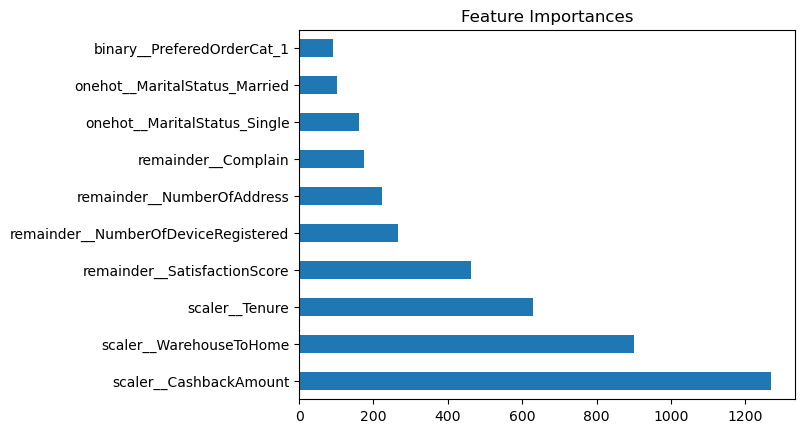

In [1515]:
coefFeat = pd.Series(best_model['model'].feature_importances_, transformer.get_feature_names_out()).sort_values(ascending = False).head(10)
coefFeat.plot(kind='barh', title='Feature Importances')
plt.show()

Berdasarkan grafik tersebut, terlihat pada model LGBM akhir bahwa fitur `CashbackAmount` adalah yang paling signifikan, kemudian diikuti oleh `WarehouseToHome`, dan `Tenure`. Fitur lainnya memiliki importance yang cukup rendah, namun bukan berarti diabaikan, tapi hanya lebih fokus pada ketiga fitur penting yang terlihat.

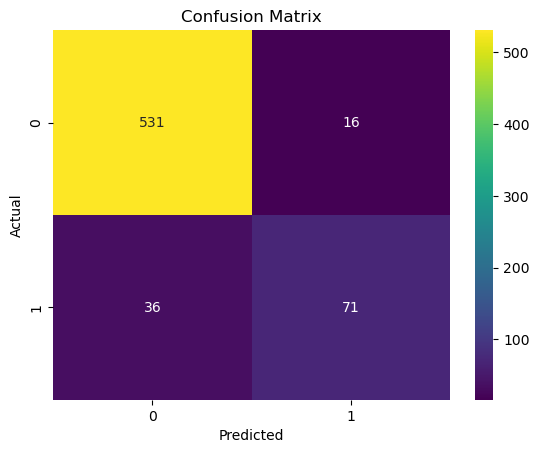

In [1521]:
cm_test = confusion_matrix(y_test, y_pred)
sns.heatmap(cm_test, annot=True, fmt='d', cmap='viridis')
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

## G. Conclusion & Recommendation

In [1516]:
print('Classification Report Tuned LGBM : \n', report_tuned)

Classification Report Tuned LGBM : 
               precision    recall  f1-score   support

           0       0.96      0.93      0.94       547
           1       0.70      0.78      0.73       107

    accuracy                           0.91       654
   macro avg       0.83      0.85      0.84       654
weighted avg       0.91      0.91      0.91       654



Berdasarkan hasil classification report dari model, dapat disimpulkan jika model digunakan untuk prediksi list customer yang akan churn, maka model ini dapat mengurangi 93% customer yang berpotensi loyal atau tidak churn untuk tidak perusahaan fokuskan dalam alokasi biaya promosi atau bahkan bisa ditiadakan, dan model ini mendapatkan 78% customer yang churn dari seluruh customer churn berdasarkan recall.

Model ini memiliki presisi prediksi customer yang churn sebesar 70%. Hal ini berarti setiap kali model memprediksi bahwa seorang customer akan churn, kemungkinan tebakannya benar itu sebesar kurang lebih 70%. Oleh karena itu, masih ada False Positive atau akan ada customer yang sebenarnya tidak churn tetapi diprediksi model sebagai customer yang churn sebanyak 7% dari keseluruhan customer yang tidak churn berdasarkan recall.

Bila diandaikan biaya promosi per customer itu 50 USD dan jumlah customer dalam suatu kurun waktu sebanyak 200 orang di mana 100 orang churn, maka dalam kasus bisnis bisa dihitung sebagai berikut :

Tanpa Model (semua customer dianggap potensi churn dan ditawarkan promosi) :
- Total Biaya promosi = 200 x 50 USD = 10,000 USD
- Biaya yang terbuang = 100 x 50 USD = 5,000 USD
- Jumlah penghematan = 0 USD

Dengan Model (hanya customer yang diprediksi oleh model churn yang kita check dan tawarkan) :
- Total Biaya promosi = (78 x 50 USD) + (7 x 50 USD) = 3050 USD + 760 USD = 4,250 USD
- Biaya yang terbuang = (100-(78+7)) x 50 USD = 750 USD 
- Jumlah penghematan = 10,000 - 4,250 = 5,750 USD

Berdasarkan contoh hitungan sederhana tersebut, terlihat bahwa dengan menggunakan model klasifikasi dan memprediksi berapa banyak porsi customer yang kemungkina churn, maka perusahaan tersebut dapat menghemat biaya yang cukup besar tanpa mengorbankan terlalu banyak customer yang churn.

#### Recommendation

Hal-hal yang bisa dilakukan untuk developer untuk mengembangkan proyek dan modelnya :
1. Membuat kebijakan dan sistem penjagaan input yang mendorong setiap kandidat untuk mengisi semua data yang diperlukan.
2. Memberi opsi input untuk yang memang tidak ada atau nol.
3. Menambahkan fitur baru yang kemungkinan bisa berhubungan dengan churn, seperti informasi yang terkait dengan pembayaran order dan deskripsi lain customer.
4. Mencoba algoritma ML lain dan melakukan hyperparameter tuning yang lebih advanced.
5. Mencoba grid search untuk metode fill pada cleaning.
6. Menganalisa data yang model masih salah tebak untuk mengetahui karakteristik data tersebut, yang pada akhirnya akan dialurkan untuk menambah fitur atau feature engineering lagi.

Rekomendasi terhadap stakeholder atau perusahaan :
1. Memperbanyak survey demi pengumpulan data yang lebih banyak secara volume maupun lebih beragam.
2. Menawarkan promosi atau strategi lain yang menawarkan sebuah insentif pada customer atau pelanggan agar tertarik dan tidak churn.
3. Berdasar feature importance, cashback dapat ditingkatkan untuk customer yang berpotensi untuk churn.
4. Customer yang memiliki tujuan pengiriman jauh dapat diberi promo agar dapat mengurangi churn akibat alasan terkait seperti biaya delivery mahal ataupun lamanya delivery.
5. Berdasarkan Tenure, perusahaan dapat mengadakan strategi marketing yang mendorong insentif untuk orang yang baru-baru memesan.
